## DHELYA APRILIANI PUTRI

## PYTN-KS019-013

##  ASSIGNMENT 2

Dataset ini berisi 22 kolom yang merupakan catatan dari setiap bangunan atau unit bangunan (apartemen, dll.) yang dijual property market kota New York selama periode 12 bulan :

a. **BOROUGH** : Kode digit untuk wilayah tempat properti berada; secara berurutan ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).

b. **BLOCK; LOT** : Kombinasi borough, blok, dan lot membentuk kunci unik untuk properti di New York City. Hal tersebut biasa disebut dengan BBL.

c. **BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE** : Jenis bangunan di berbagai titik waktu.


# Import pustaka

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import scipy.stats
from scipy.stats import t
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import datetime

In [137]:
df  = pd.read_csv('nyc-rolling-sales.csv')
pd.set_option("display.max_columns", 22) # Untuk menunjukkan semua kolom

In [138]:
df = df.copy() # Copy dataset

In [139]:
df.head() # Menampilkan 5 data pertama

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [140]:
df.tail() # Menampilkan 5 data pertama

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [141]:
df.shape

(84548, 22)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

**Baris 84548**

**Kolom 22**

# Data Cleaning dan Preprocessing

In [143]:
# Drop kolom unnecessary

df.drop(['Unnamed: 0', 'BLOCK', 'LOT', 'EASE-MENT', 'APARTMENT NUMBER', 'ADDRESS', 'ZIP CODE'], axis=1, inplace=True)

In [144]:
# Mengganti tipe beberapa kolom menjadi categorical

df['BOROUGH'] = df['BOROUGH'].astype('category')
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].astype('category')
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['YEAR BUILT'] = df['YEAR BUILT'].astype('category')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['BUILDING CLASS AT TIME OF SALE'] = df['BUILDING CLASS AT TIME OF SALE'].astype('category')
df['BUILDING CLASS AT PRESENT'] = df['BUILDING CLASS AT PRESENT'].astype('category')
df.dtypes

BOROUGH                           category
NEIGHBORHOOD                      category
BUILDING CLASS CATEGORY           category
TAX CLASS AT PRESENT              category
BUILDING CLASS AT PRESENT         category
RESIDENTIAL UNITS                    int64
COMMERCIAL UNITS                     int64
TOTAL UNITS                          int64
LAND SQUARE FEET                    object
GROSS SQUARE FEET                   object
YEAR BUILT                        category
TAX CLASS AT TIME OF SALE         category
BUILDING CLASS AT TIME OF SALE    category
SALE PRICE                          object
SALE DATE                           object
dtype: object

In [145]:
# Membuat kolom baru berisikan keterangan waktu bulan dan tahun

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE MONTH']= df['SALE DATE'].dt.month_name()
df['SALE YEAR']= df['SALE DATE'].dt.year

In [146]:
# Mengubah tipe beberapa kolom menjadi numerical

df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

In [147]:
# Memeriksa missing values dan drop missing values pada dataset

cek_missing_value = round((df.isnull().sum())/len(df)*100, 2)
cek_missing_value

BOROUGH                            0.00
NEIGHBORHOOD                       0.00
BUILDING CLASS CATEGORY            0.00
TAX CLASS AT PRESENT               0.00
BUILDING CLASS AT PRESENT          0.00
RESIDENTIAL UNITS                  0.00
COMMERCIAL UNITS                   0.00
TOTAL UNITS                        0.00
LAND SQUARE FEET                  31.05
GROSS SQUARE FEET                 32.66
YEAR BUILT                         0.00
TAX CLASS AT TIME OF SALE          0.00
BUILDING CLASS AT TIME OF SALE     0.00
SALE PRICE                        17.22
SALE DATE                          0.00
SALE MONTH                         0.00
SALE YEAR                          0.00
dtype: float64

Berdasarkan informasi missing values di atas, diketahui bahwa terdapat 31% missing values pada kolom LAND SQUARE FEET, 33% missing values pada kolom GROSS SQUARE FEET, dan 17% missing values pada kolom SALE PRICE. Sebelumnya telah diketahui bahwa dataset yang digunakan merupakan financial dataset di mana terdapat keterangan jika harga properti yang terjual senilai $0, maka ada beberapa kemungkinan bahwa properti tersebut merupakan transferring ownership. Selain itu, kolom LAND SQUARE FEET dan GROSS SQUARE FEET yang mengandung missing values dianggap data yang tidak valid, sehingga semua missing values akan didrop atau dihilangkan dari dataset.

In [148]:
df = df.dropna()

In [149]:
# Memeriksa kembali apakah masih terdapat missing values

df.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BUILDING CLASS AT PRESENT         False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
SALE MONTH                        False
SALE YEAR                         False
dtype: bool

In [150]:
# Memeriksa duplikasi dan drop baris yang mengandung duplikasi pada dataset

df.duplicated().sum()

959

Diketahui terdapat 959 baris duplikasi, sehingga baris ini akan didrop atau dihilangkan dari dataset.

In [151]:
# Menghapus nilai duplikasi

df = df.drop_duplicates(df.columns, keep='last')

In [152]:
# Mapping pada kolom BOROUGH

df['BOROUGH'] = df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})

In [153]:
df.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE DATE,SALE YEAR
count,47285.000000,47285.000000,47285.000000,4.728500e+04,4.728500e+04,4.728500e+04,47285,47285.000000
mean,2.514053,0.239717,2.770561,3.291470e+03,3.530269e+03,1.171341e+06,2017-02-25 20:36:21.393676544,2016.647393
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2016-09-01 00:00:00,2016.000000
25%,1.000000,0.000000,1.000000,1.463000e+03,8.840000e+02,1.247340e+05,2016-11-29 00:00:00,2016.000000
50%,1.000000,0.000000,1.000000,2.150000e+03,1.628000e+03,4.900000e+05,2017-02-27 00:00:00,2017.000000
75%,2.000000,0.000000,2.000000,3.088000e+03,2.520000e+03,8.400000e+05,2017-05-26 00:00:00,2017.000000
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2.210000e+09,2017-08-31 00:00:00,2017.000000
std,16.532690,10.915300,19.935527,3.071844e+04,2.916192e+04,1.352859e+07,NaN,0.477787


In [154]:
df.describe(include='category')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
count,47285,47285,47285,47285,47285,47285,47285,47285
unique,5,251,47,11,160,151,4,160
top,Brooklyn,BEDFORD STUYVESANT,01 ONE FAMILY DWELLINGS,1,A1,1920,1,A1
freq,23395,1387,14301,30953,5224,4465,32151,5219


Text(0.5, 1.0, 'Distribusi SALE PRICE')

<Figure size 1000x500 with 0 Axes>

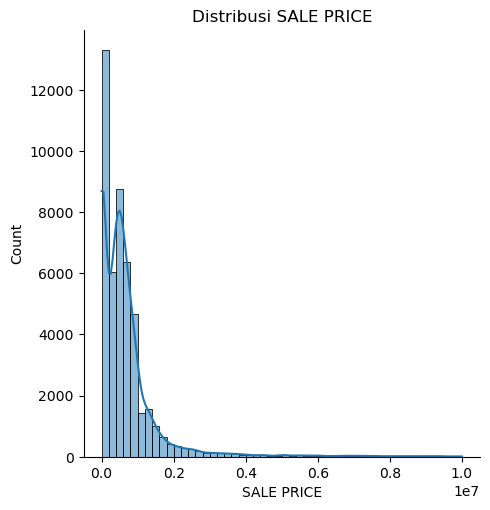

In [155]:
# Histogram distribusi 'SALE PRICE' kurang dari 10,000,000

df = df[df['SALE PRICE']<10000000].copy()
plt.figure(figsize=(10,5))
sns.displot(df['SALE PRICE'], kde=True, bins=50)
plt.title('Distribusi SALE PRICE')

Karena masih terdapat nilai harga penjualan yang berbeda signifikan, maka akan nilai harga penjualan di atas 5.000.000 USD tidak akan disertakan, selain itu berdasarkan nilai kuartil-1 yaitu sekitar 100.000 USD, harga penjualan di bawah ini juga tidak akan disertakan dalam analisis. Sehingga, didapatkan distribusi frekuensi sebagai berikut:

Text(0.5, 1.0, 'Distribusi SALE PRICE')

<Figure size 1000x500 with 0 Axes>

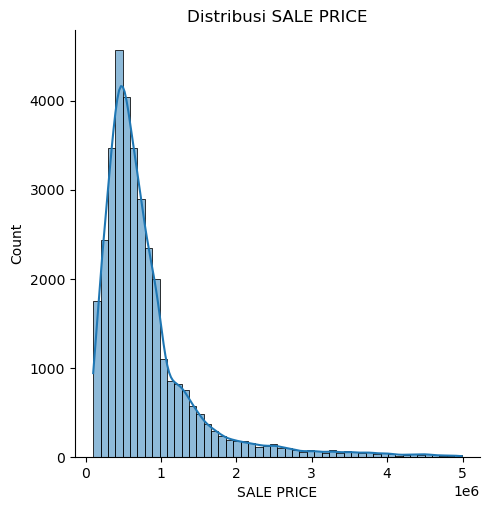

In [156]:
# Histogram distribusi 'SALE PRICE' pada rentang nilai antara 100,000 dan 5,000,000

df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]
plt.figure(figsize=(10,5))
sns.displot(df['SALE PRICE'], kde=True, bins=50)
plt.title('Distribusi SALE PRICE')

In [157]:
df['SALE PRICE'].describe() #Statistik deskriptif dari kolom Sale Price

count    3.458700e+04
mean     7.965060e+05
std      6.536591e+05
min      1.007000e+05
25%      4.160950e+05
50%      6.160000e+05
75%      9.300000e+05
max      4.986410e+06
Name: SALE PRICE, dtype: float64

Berdasarkan analisis di atas, diketahui bahwa kolom SALE PRICE pada dataset awal memiliki nilai minimum 0 dan nilai maksimum sekitar 2.000.000.000 USD, di mana nilai di bawah kuartil 1 dan nilai di atas kuartil 3 dianggap sebagai outlier, sehingga pada dataset akhir didapat nilai minimum sekitar 100.000 USD dan nilai maksimum sekitar 5.000.000 USD.

# Land Square Feet and Gross Square Feet

Berdasarkan tabel informasi statistik pada kolom LAND SQUARE FEET dan GROSS SQUARE FEET, terdapat nilai 0 pada kedua kolom ini, sehingga baris yang mengandung nilai 0 pada kedua kolom ini tidak disertakan dalam analisis karena ukuran lahan properti dalam satuan feet tidak memiliki kemungkinan bernilai 0.

In [158]:
# Menghapus baris yang memiliki nilai sama dengan nol 

df = df[df['GROSS SQUARE FEET'] != 0]
df = df[df['LAND SQUARE FEET'] != 0]

# Total Units

In [159]:
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS']).count().sort_values(by='SALE PRICE', ascending=False)

,SALE PRICE
TOTAL UNITS,
1,12645
2,9507
3,2720
4,704
6,361
...,...
51,1
34,1
47,1


Berdasarkan tabel berikut diketahui bahwa terdapat 1 gedung properti yang memiliki total unit 2261, sehingga baris ini tidak disertakan dalam analisis.

In [160]:
# membersihkan data dari entri yang tidak relevan atau memiliki nilai yang tidak valid pada kolom 'TOTAL UNITS'

df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2261)]

# YEAR BUILT

Nilai 0 pada kolom YEAR BUILT tidak akan disertakan dalam analisis.

In [161]:
# Menghapus baris pada YEAR BUILT yang memiliki nilai sama dengan nol 

df = df[df['YEAR BUILT'] != 0]

In [162]:
# Final data

df.reset_index(inplace=True) # mengurutkan indeks sesuai dengan nomor baris
df.head()

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR
0,3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,September,2016
1,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,September,2016
2,172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,November,2016
3,174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S5,5,1,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03,April,2017
4,195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,September,2016


In [163]:
# dimensi dataset baru

df.shape

(26655, 18)

In [164]:
# informasi dataset baru

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26655 entries, 0 to 26654
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26655 non-null  int64         
 1   BOROUGH                         26655 non-null  category      
 2   NEIGHBORHOOD                    26655 non-null  category      
 3   BUILDING CLASS CATEGORY         26655 non-null  category      
 4   TAX CLASS AT PRESENT            26655 non-null  category      
 5   BUILDING CLASS AT PRESENT       26655 non-null  category      
 6   RESIDENTIAL UNITS               26655 non-null  int64         
 7   COMMERCIAL UNITS                26655 non-null  int64         
 8   TOTAL UNITS                     26655 non-null  int64         
 9   LAND SQUARE FEET                26655 non-null  float64       
 10  GROSS SQUARE FEET               26655 non-null  float64       
 11  YE

In [165]:
df.drop('index', axis=1, inplace=True)

# Measure of Central Tendency

In [166]:
df.describe() # Nilai statistik kolom numerik pada dataset baru

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE DATE,SALE YEAR
count,26655.000000,26655.000000,26655.000000,2.665500e+04,2.665500e+04,2.665500e+04,26655,26655.000000
mean,2.080773,0.117802,2.197336,3.603452e+03,2.686305e+03,8.062293e+05,2017-02-26 03:19:07.867192064,2016.647383
min,0.000000,0.000000,1.000000,2.000000e+02,1.200000e+02,1.007000e+05,2016-09-01 00:00:00,2016.000000
25%,1.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,4.400000e+05,2016-11-29 00:00:00,2016.000000
50%,2.000000,0.000000,2.000000,2.500000e+03,1.813000e+03,6.250000e+05,2017-02-27 00:00:00,2017.000000
75%,2.000000,0.000000,2.000000,3.840000e+03,2.505000e+03,9.210510e+05,2017-05-26 00:00:00,2017.000000
max,1844.000000,126.000000,1866.000000,4.228300e+06,3.750565e+06,4.975000e+06,2017-08-31 00:00:00,2017.000000
std,12.937363,1.258036,13.119845,3.212287e+04,2.520718e+04,6.452676e+05,NaN,0.477794


# DISTRIBUSI STATISTIK

In [167]:
# Statistik harga perjuaan unit properti di New York City

df["SALE PRICE"].describe()

count    2.665500e+04
mean     8.062293e+05
std      6.452676e+05
min      1.007000e+05
25%      4.400000e+05
50%      6.250000e+05
75%      9.210510e+05
max      4.975000e+06
Name: SALE PRICE, dtype: float64

In [168]:
#  Modus harga penjualan unit properti di New York City

df['SALE PRICE'].mode()[0]

700000.0

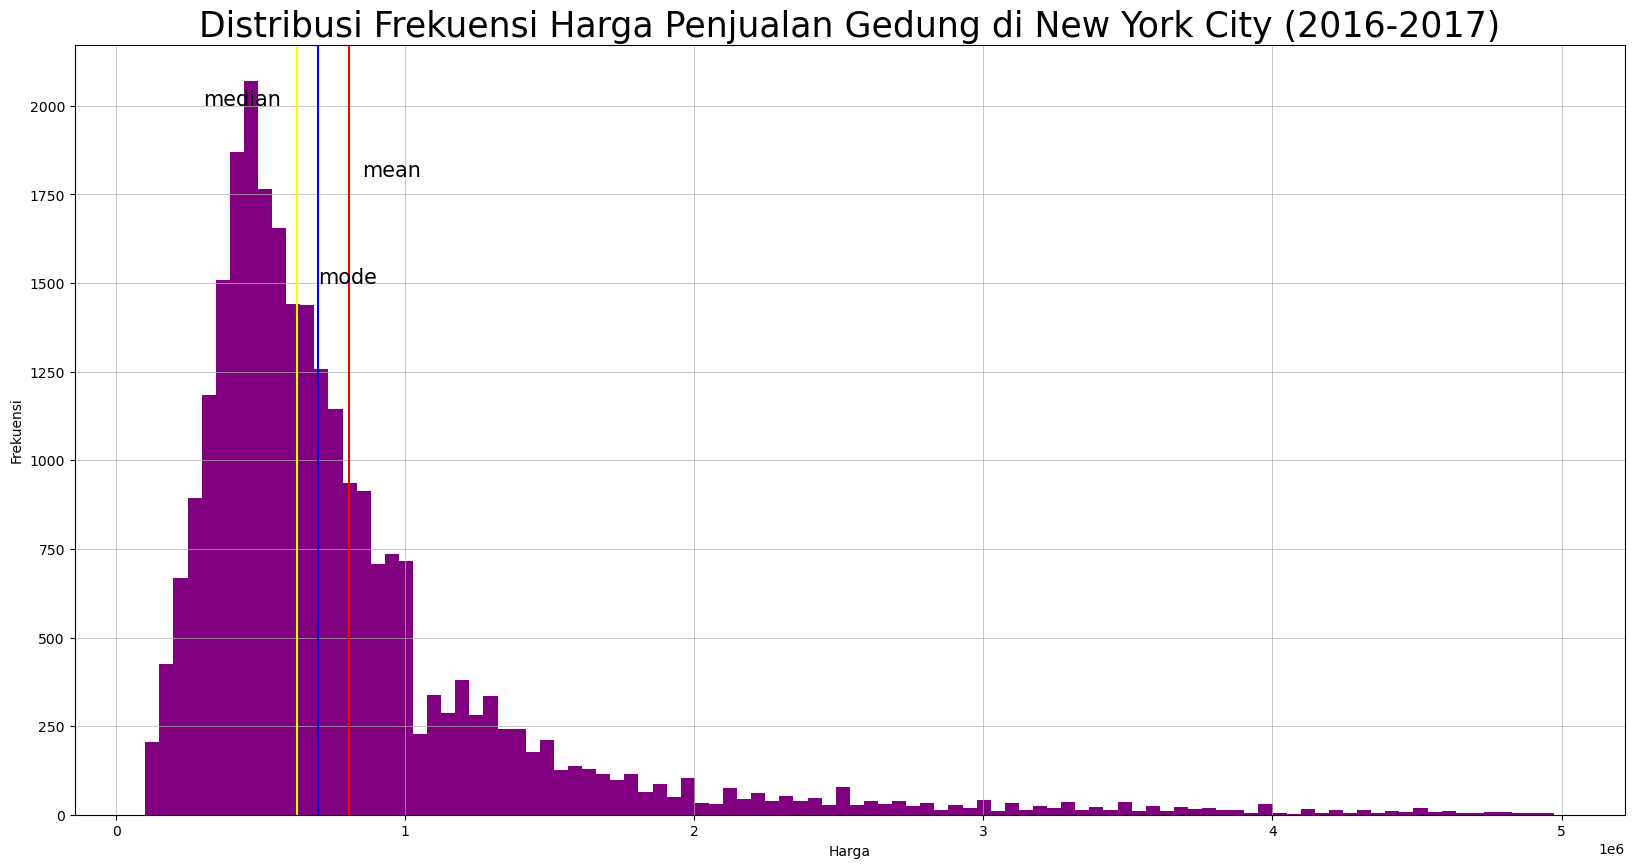

In [169]:
df['SALE PRICE'].plot(kind='hist', figsize=(20,10), bins=100, color='purple')
plt.title('Distribusi Frekuensi Harga Penjualan Gedung di New York City (2016-2017)', fontsize=25)
plt.xlabel('Harga', fontsize=10)
plt.ylabel('Frekuensi', fontsize=10)
plt.axvline(df['SALE PRICE'].mean(), c='red')
plt.axvline(df['SALE PRICE'].median(), c='yellow')
plt.axvline(df['SALE PRICE'].mode()[0], c='blue')
plt.text(300000, 2000, 'median', fontsize=15)
plt.text(850000, 1800, 'mean', fontsize=15)
plt.text(700000, 1500, 'mode', fontsize=15)
plt.grid(linewidth=0.5)

In [170]:
# Dapat diketahui distribusi statistik harga penjualan properti di New York pada tahun 2016 - 2017, frekuensi tertinggi harga properti di bawah 1.000.000 USD. Rerat harga penjualan properti sebesar 800.000 USD, nilai tengah atau median harga penjualan properti sebesar 625.000 USD, dan properti di New York City paling banyak terjual di harga 700.000 USD. Selanjutnya akan dilihat ukuran penyebaran harga properti berikut:

print('Range: ', np.ptp(df['SALE PRICE']))
print('Variance: ', df['SALE PRICE'].var())
print('Standar Deviation: ', (df['SALE PRICE'].var())**0.5)
print('Skewness: ', scipy.stats.skew(df['SALE PRICE'], bias=False))

Range:  4874300.0
Variance:  416370292114.4177
Standar Deviation:  645267.6127890022
Skewness:  2.8223333167781344


Diketahui bahwa nilai varians dan standar deviasi cukup besar, artinya data sangat bervariasi atau memiliki variasi nilai yang sangat banyak. Dalam kata lain, rata-rata jarak penyimpangan setiap titik data terhadap rata-ratanya sangat besar. Selain itu, harga penjualan properti juga memiliki nilai *skewness* atau kemiringan yang positif, yang berarti nila rata-rata lebih besar dari nilai tengahnya. *Range* atau selisih nilai maksimum dan minimumnya adalah 4.874.300 USD.

# Perbedaan nilai statistik harga penjualan berdasarkan wilayahnya BOROUGH

In [171]:
# Membuat tabel nilai rata-rata harga penjualan berdasarkan masing-masing borough

df_borough = df[['BOROUGH','SALE PRICE']]
df_borough_mean = df_borough.groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True).reset_index()

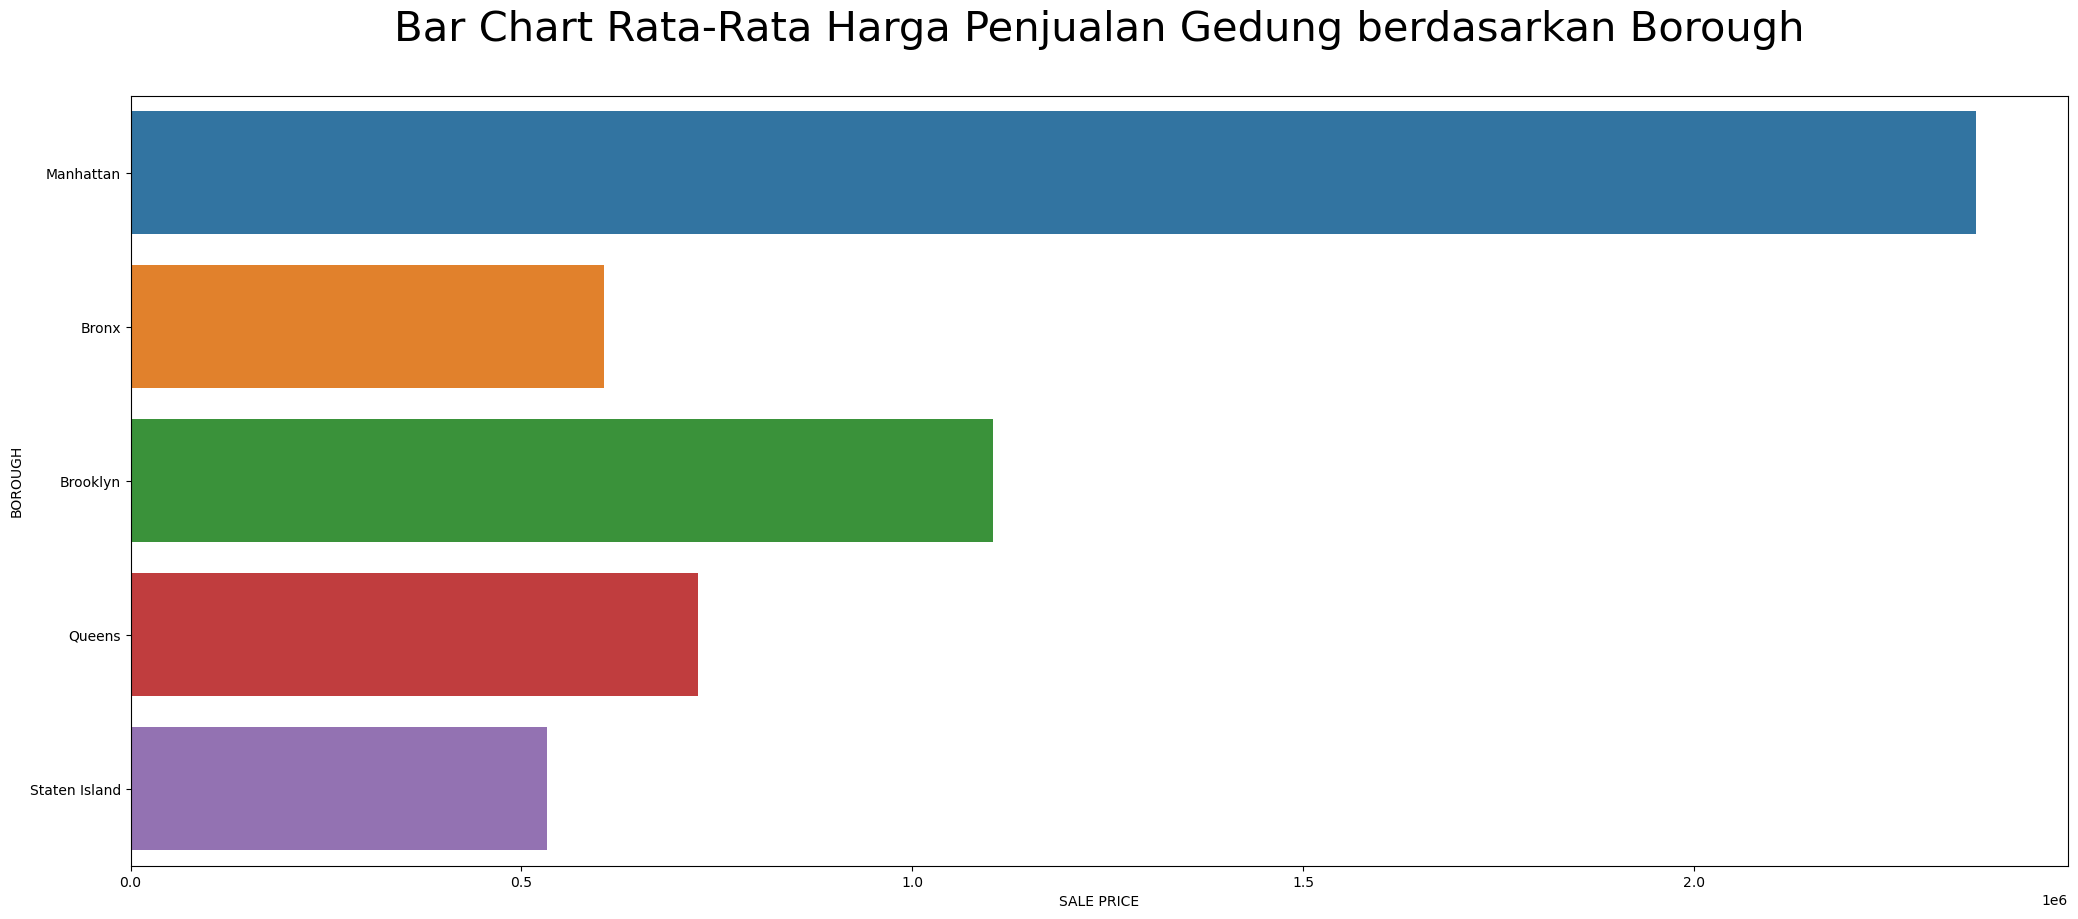

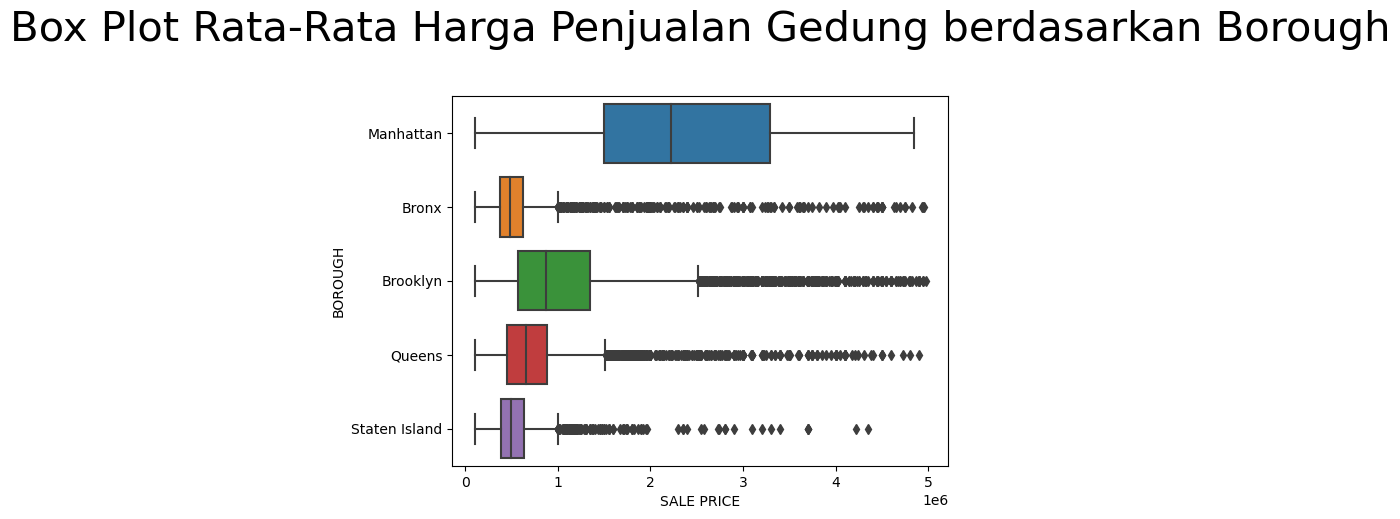

In [172]:
plt.figure(figsize=(25,10))
# Bar chart
sns.barplot(y = 'BOROUGH', x = 'SALE PRICE', data = df_borough_mean )
plt.title('Bar Chart Rata-Rata Harga Penjualan Gedung berdasarkan Borough\n', fontsize=30)
plt.show()
# Box plot
sns.boxplot(y = 'BOROUGH', x = 'SALE PRICE', data = df_borough)
plt.title('Box Plot Rata-Rata Harga Penjualan Gedung berdasarkan Borough\n', fontsize=30)
plt.show()

Berdasarkan plot di atas, diketahui bahwa wilayah Manhattan memiliki rata-rata harga penjualan properti tertinggi, sedangkan wilayah Staten Island memiliki rata-rata harga penjualan properti terendah. Sehingga dapat disimpulkan juga bahwa masing-masing wilayah memiliki perbedaan rata-rata harga penjualan properti, terutama pada wilayah Manhattan yang memiliki perbedaan rata-rata yang cukup signifikan dibandingkan wilayah lain. Berikut adalah nilai varians dan standar deviasi masing-masing wilayah:

In [173]:
# Membuat tabel nilai harga penjualan berdasarkan masing-masing borough
df_manhattan = df_borough[df_borough['BOROUGH']=='Manhattan']
df_bronx = df_borough[df_borough['BOROUGH']=='Bronx']
df_brooklyn = df_borough[df_borough['BOROUGH']=='Brooklyn']
df_queens = df_borough[df_borough['BOROUGH']=='Queens']
df_staten = df_borough[df_borough['BOROUGH']=='Staten Island']

# Menampilkan nilai varians dan standar deviasi masing-masing borough
print('Variance and Standar Deviation each Borough:\n')
print('Manhattan: ', round(df_manhattan['SALE PRICE'].var(), 2), 'and', round((df_manhattan['SALE PRICE'].var())**0.5, 2))
print('Bronx: ', round(df_bronx['SALE PRICE'].var(), 2), 'and', round((df_bronx['SALE PRICE'].var())**0.5, 2))
print('Brooklyn: ', round(df_brooklyn['SALE PRICE'].var(), 2), 'and', round((df_brooklyn['SALE PRICE'].var())**0.5, 2))
print('Queens: ', round(df_queens['SALE PRICE'].var(), 2), 'and', round((df_queens['SALE PRICE'].var())**0.5, 2))
print('Staten Island: ', round(df_staten['SALE PRICE'].var(), 2), 'and', round((df_staten['SALE PRICE'].var())**0.5, 2))

Variance and Standar Deviation each Borough:

Manhattan:  1506488719848.28 and 1227391.02
Bronx:  330669796970.95 and 575038.95
Brooklyn:  645118390901.69 and 803192.62
Queens:  206244526894.44 and 454141.53
Staten Island:  75236840611.09 and 274293.35


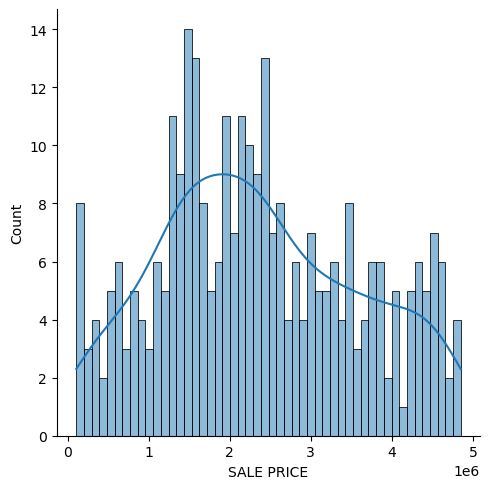

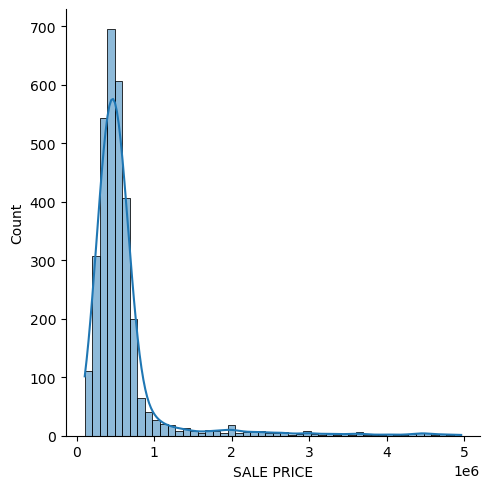

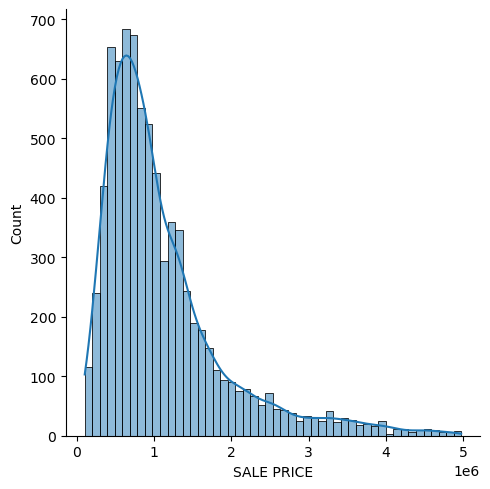

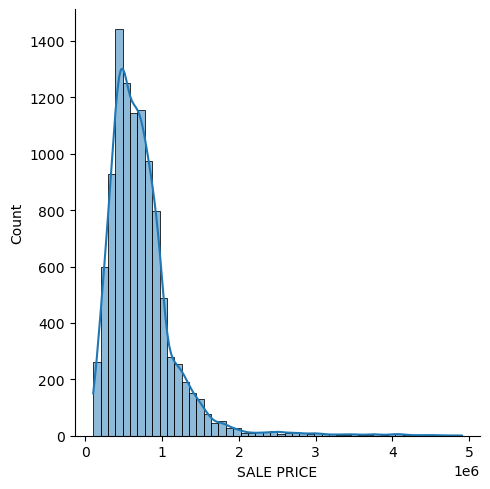

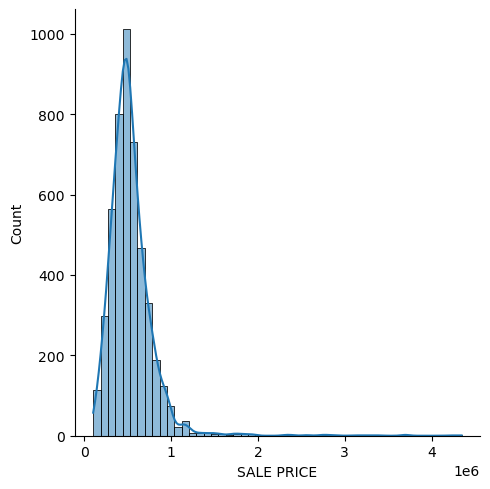

In [174]:
sns.displot(df_manhattan['SALE PRICE'], kde=True, bins=50)
sns.displot(df_bronx['SALE PRICE'], kde=True, bins=50)
sns.displot(df_brooklyn['SALE PRICE'], kde=True, bins=50)
sns.displot(df_queens['SALE PRICE'], kde=True, bins=50)
sns.displot(df_staten['SALE PRICE'], kde=True, bins=50)

Berdasarkan *output* di atas, diketahui secara grafis bahwa wilayah Bronx, Brooklyn, Queens, dan Staten Island tidak memiliki perbedaan distribusi frekuensi nilai harga penjualan properti yang signifikan. Sedangkan wilayah Manhattan memiliki distribusi frekuensi yang berbeda dengan wilayah lain. Dilihat dari nilai statistik varians dan standar deviasi, wilayah Manhattan memiliki nilai varians dan standar deviasi tertinggi, yang berarti nilai harga penjualan properti di Manhattan sangat bervariasi dibandingkan dengan daerah lain.

In [175]:
df['BOROUGH'].mode()[0] 

'Queens'

# Rata-rata harga penjualan properti di NYC per bulan (September 2016 - Agustus 2017)

In [176]:
df_month = df[['SALE MONTH', 'SALE YEAR', 'SALE PRICE']]
df_month['SALE MONTH'] = df_month['SALE MONTH'].apply(lambda x: str(x))
df_month['SALE YEAR'] = df_month['SALE YEAR'].apply(lambda x: str(x))
df_month['SALE TIME'] = df_month['SALE MONTH'] + ' ' + df_month['SALE YEAR']
df_month.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_15800\505570047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['SALE MONTH'] = df_month['SALE MONTH'].apply(lambda x: str(x))
C:\Users\ACER\AppData\Local\Temp\ipykernel_15800\505570047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['SALE YEAR'] = df_month['SALE YEAR'].apply(lambda x: str(x))
C:\Users\ACER\AppData\Local\Temp\ipykernel_15800\505570047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,SALE MONTH,SALE YEAR,SALE PRICE,SALE TIME
0,September,2016,3936272.0,September 2016
1,September,2016,3192840.0,September 2016
2,November,2016,3300000.0,November 2016
3,April,2017,4750000.0,April 2017
4,September,2016,3700000.0,September 2016


In [177]:
df_month = df_month.drop(['SALE MONTH', 'SALE YEAR'], axis=1)
df_month = df_month.groupby('SALE TIME').mean().sort_values(by='SALE TIME')
df_month

,SALE PRICE
SALE TIME,
April 2017,775425.927443
August 2017,892511.335432
December 2016,780464.313600
February 2017,823491.241448
January 2017,813283.429505
July 2017,833176.120229
June 2017,834574.421857
March 2017,770478.917018
May 2017,832124.750543


<Axes: title={'center': 'Rata-rata Harga Penjualan Properti di NYC  Per bulan (Sept 2016 - Aug 2017)'}, xlabel='SALE TIME', ylabel='SALE PRICE'>

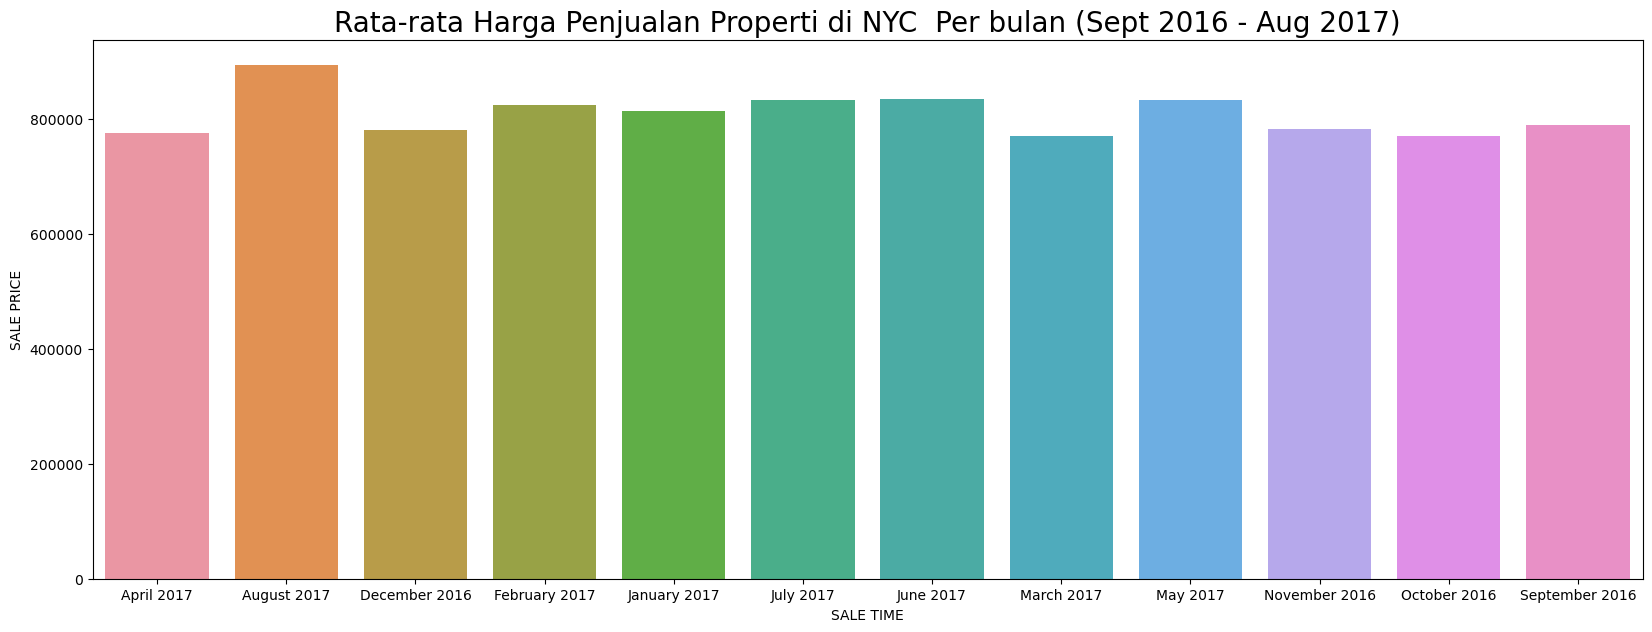

In [178]:
df_month.reset_index(inplace=True)
plt.figure(figsize=(20,7))
plt.title('Rata-rata Harga Penjualan Properti di NYC  Per bulan (Sept 2016 - Aug 2017)', fontsize=20)
sns.barplot(x=df_month['SALE TIME'], y=df_month['SALE PRICE'])

Berdasarkan *output* berikut, dapat dilihat secara grafis bahwa rata-rata harga penjualan properti di NYC selama September 2016 sampai dengan Agustus 2017 tidak mengalami fluktuasi rata-rata harga yang signifikan. Namun, dapat dilihat bahwa bulan Agustus 2017 mengalami rata-rata harga penjualan properti tertinggi.

In [179]:
df_month['SALE TIME'].mode()[0]

'April 2017'

# Rata-Rata Harga Penjualan Gedung berdasarkan Tahun Dibangunnya Gedung Tersebut

C:\Users\ACER\AppData\Local\Temp\ipykernel_15800\1021802050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearbuilt['YEAR BUILT'] = df_yearbuilt['YEAR BUILT'].astype(int)


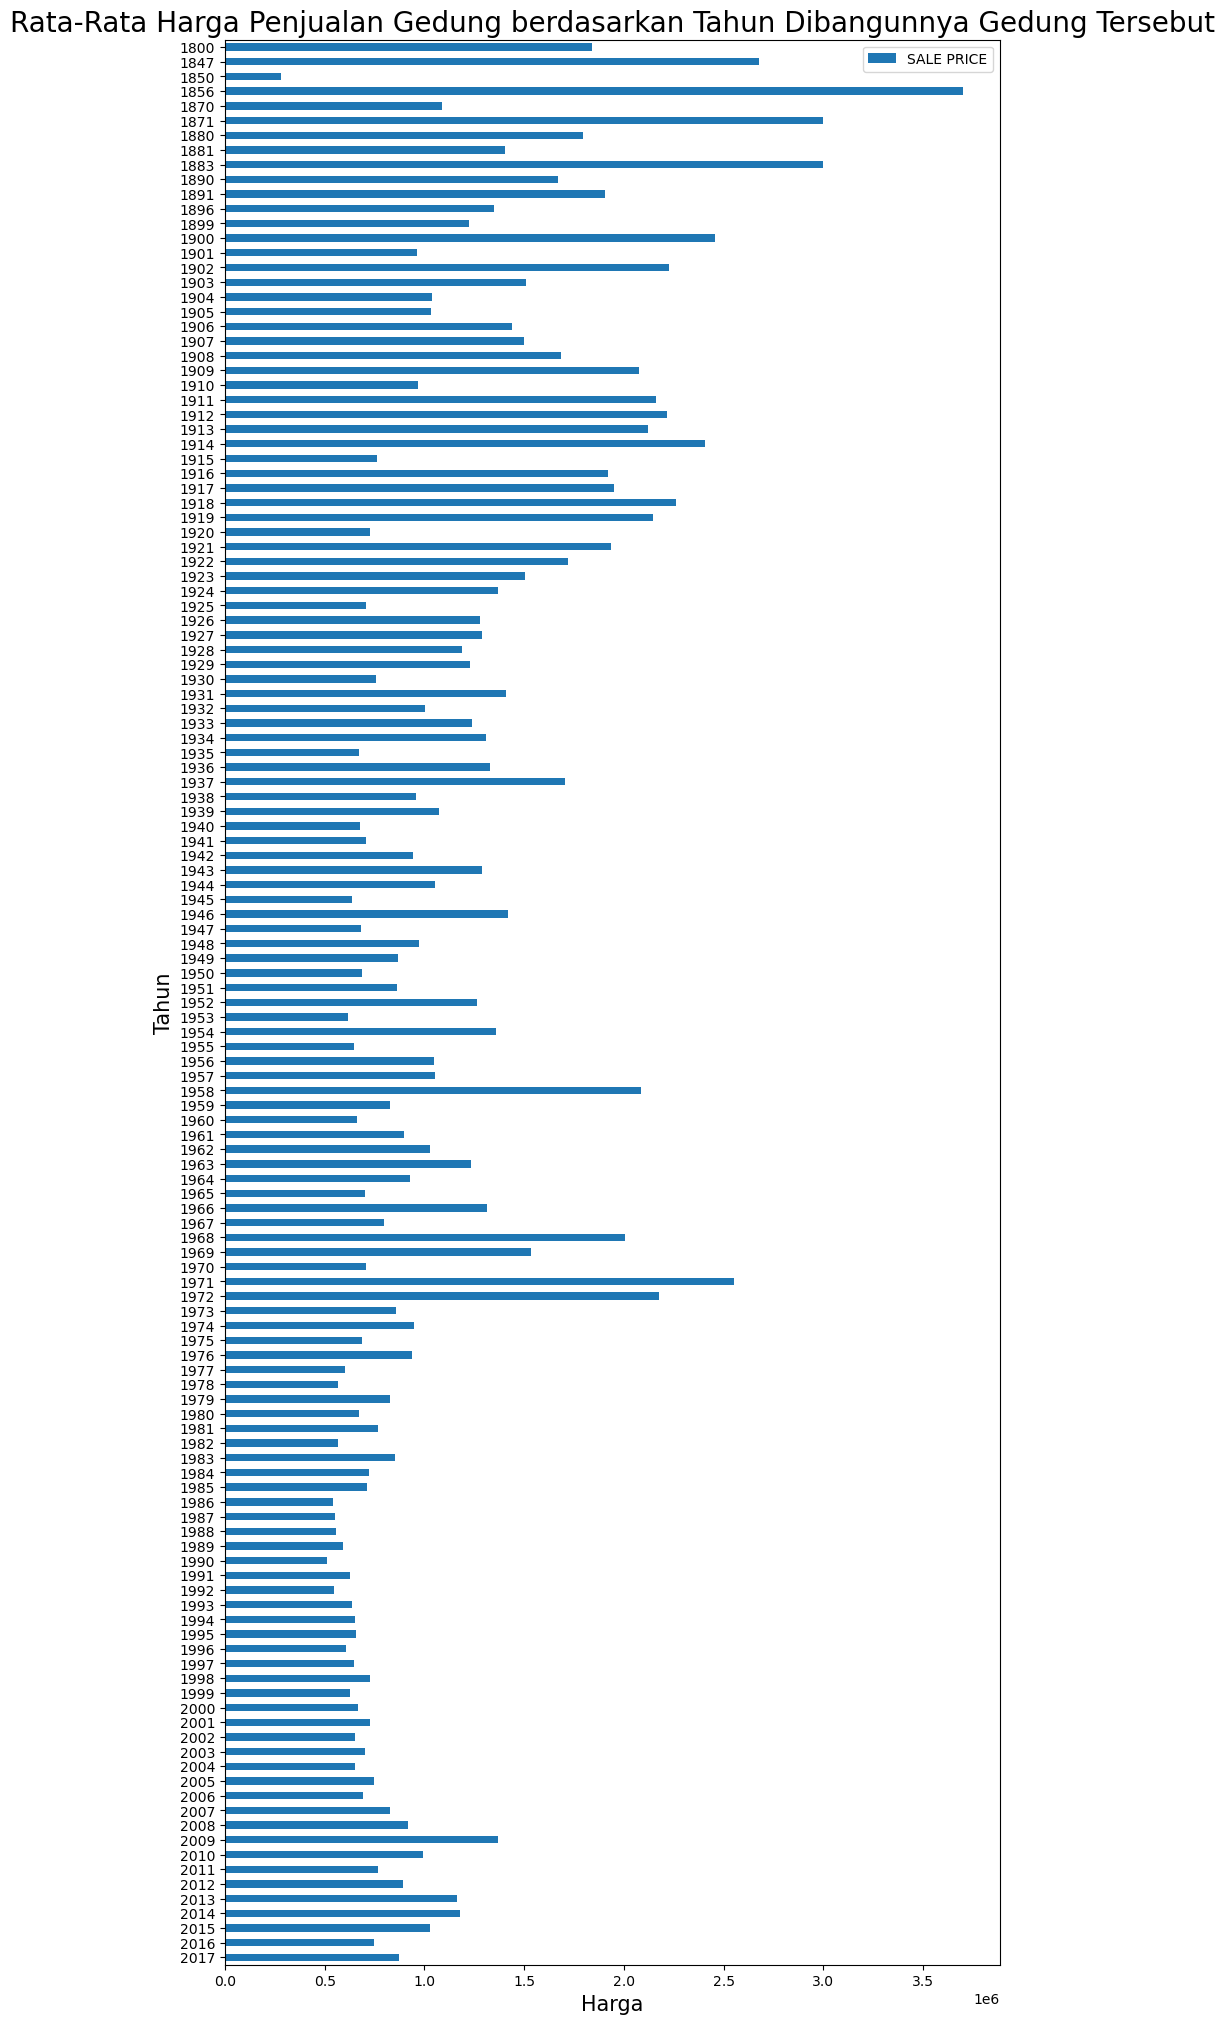

In [180]:
df_yearbuilt = df[['YEAR BUILT', 'SALE PRICE']]
df_yearbuilt['YEAR BUILT'] = df_yearbuilt['YEAR BUILT'].astype(int)
df_yearbuilt_mean = df_yearbuilt.groupby('YEAR BUILT').mean().sort_values(by='YEAR BUILT', ascending=False)
df_yearbuilt_mean.dropna(inplace=True)

df_yearbuilt_mean.plot(kind='barh', figsize=(10,25))
plt.title("Rata-Rata Harga Penjualan Gedung berdasarkan Tahun Dibangunnya Gedung Tersebut", fontsize=20)
plt.xlabel('Harga', fontsize=15)
plt.ylabel('Tahun', fontsize=15)
plt.show()

Berdasarkan plot di atas, dapat diketahui secara grafis bahwa rata-rata harga penjualan properti tidak memiliki perbedaan yang signifikan berdasarkan tahun dibuatnya gedung/properti tersebut. Namun, semakin lama usia tersebut cenderung rata-rata harga penjualannya semakin tinggi.

# Perbedaan nilai statistik harga penjualan unit berdasarkan BUILDING CLASS CATEGORY

In [181]:
df['BUILDING CLASS CATEGORY'].nunique()

24

Diketahui terdapat 24 kategori kelas bangunan dalam dataset. Akan dilihat kategori kelas yang memiliki rata-rata harga penjualan properti tertinggi.

In [182]:
df_buildingClass = df[['BUILDING CLASS CATEGORY','SALE PRICE']]

# 10 kategori kelas yang memiliki rata-rata harga penjualan tertinggi
top10buildingClass = df_buildingClass.groupby('BUILDING CLASS CATEGORY').mean().sort_values(by='SALE PRICE', ascending=True)
top10buildingClass = top10buildingClass.head(10)
top10buildingClass

,SALE PRICE
BUILDING CLASS CATEGORY,
09 COOPS - WALKUP APARTMENTS,3.062000e+05
10 COOPS - ELEVATOR APARTMENTS,3.750987e+05
01 ONE FAMILY DWELLINGS,6.228320e+05
31 COMMERCIAL VACANT LAND,6.500000e+05
06 TAX CLASS 1 - OTHER,7.508050e+05
05 TAX CLASS 1 VACANT LAND,7.670202e+05
02 TWO FAMILY DWELLINGS,7.792700e+05
03 THREE FAMILY DWELLINGS,9.741453e+05
33 EDUCATIONAL FACILITIES,1.217917e+06


Text(0.5, 1.0, '10 Building Class dengan Rata-rata Harga Penjualan Tertinggi\n')

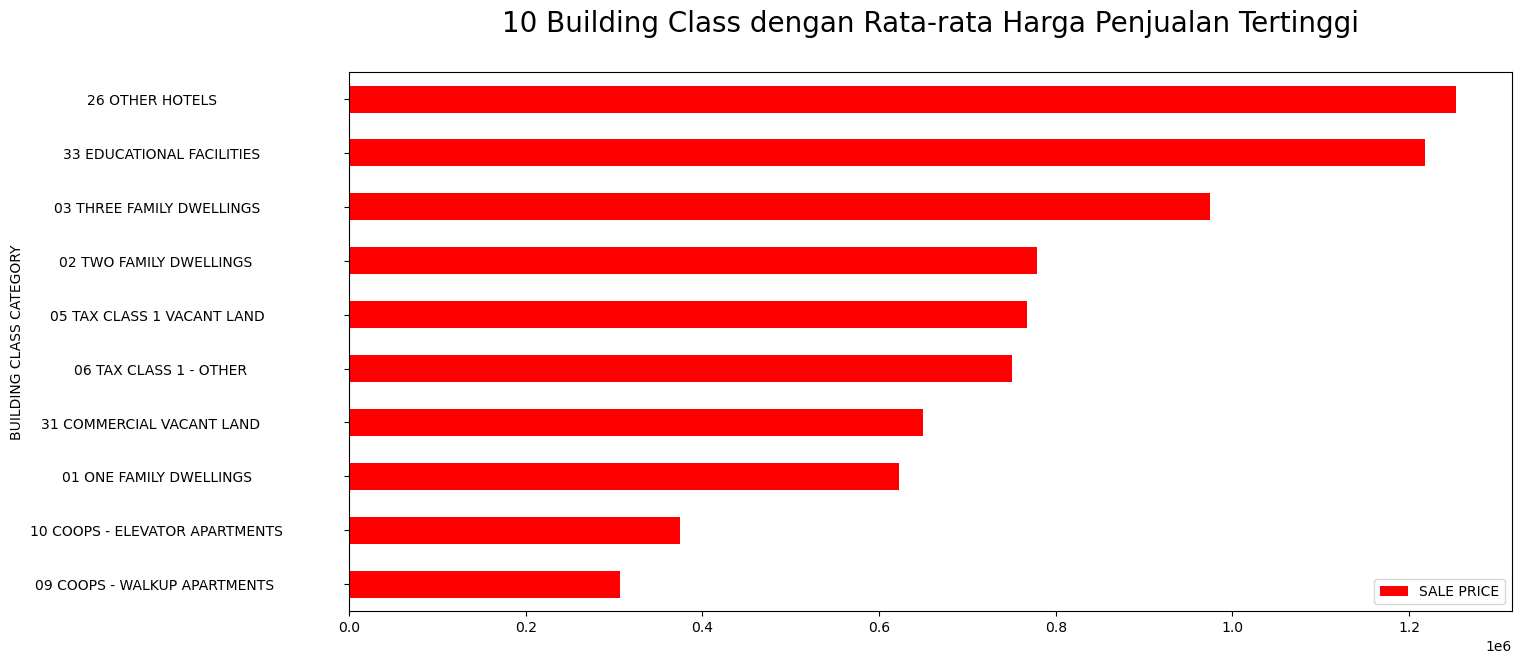

In [183]:
top10buildingClass.plot(kind='barh', figsize=(15,7), color='red')
plt.title('10 Building Class dengan Rata-rata Harga Penjualan Tertinggi\n', fontsize=20)

Berdasarkan plot di atas, diketahui bahwa kategor **OTHER HOTELS** memiliki rata-rata harga penjualan tertinggi, diikuti dengan kategori **EDUCATIONAL FACILITIES**, **THREE FAMILY DWELLINGS**, dan seterusnya. Sehingga dapat disimpulkan bahwa kategori kelas bangunan mempengaruhi variasi rata-rata harga penjualan bangunan tersebut.

In [184]:
df['BUILDING CLASS CATEGORY'].mode()[0]

'01 ONE FAMILY DWELLINGS                    '

BUILDING CLASS CATEGORY dengan jumlah penjualan tertinggi adalah kategori **ONE FAMILY DWELLINGS**.

# Distribusi statistik ukuran luas tanah properti (dalam square feet) (GROSS SQUARE FEET & LAND SQUARE FEET)

In [185]:
df_sqf = df[['GROSS SQUARE FEET','LAND SQUARE FEET']]
df_sqf.head()

,GROSS SQUARE FEET,LAND SQUARE FEET
0,6794.0,2272.0
1,4226.0,1750.0
2,3360.0,1520.0
3,3713.0,1779.0
4,3586.0,1218.0


In [186]:
df_sqf.describe() #nilai statistik kolom gross square feet & land square feet

,GROSS SQUARE FEET,LAND SQUARE FEET
count,2.665500e+04,2.665500e+04
mean,2.686305e+03,3.603452e+03
std,2.520718e+04,3.212287e+04
min,1.200000e+02,2.000000e+02
25%,1.344000e+03,2.000000e+03
50%,1.813000e+03,2.500000e+03
75%,2.505000e+03,3.840000e+03
max,3.750565e+06,4.228300e+06


Perlu diperhatikan bahwa masih terdapat nilai outlier yang tidak dapat disertakan dalam analisis. Nilai luas lahan seluruhnya dan luas bangunan properti yang lebih besar dari nilai statistik kuartil-3 dianggap sebagai outlier dan tidak disertakan dalam analisis.

In [187]:
df_sqf = df_sqf[df_sqf['GROSS SQUARE FEET'] < 3000]
df_sqf = df_sqf[df_sqf['LAND SQUARE FEET'] < 4000]

In [188]:
# Modus

print('Nilai modus kolom GROSS SQUARE FEET:', df_sqf['GROSS SQUARE FEET'].mode()[0])
print('Nilai modus kolom LAND SQUARE FEET:', df_sqf['LAND SQUARE FEET'].mode()[0]) 

Nilai modus kolom GROSS SQUARE FEET: 1600.0
Nilai modus kolom LAND SQUARE FEET: 2000.0


<Figure size 1200x700 with 0 Axes>

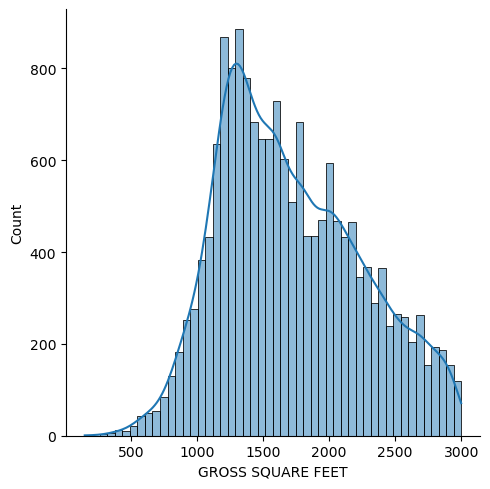

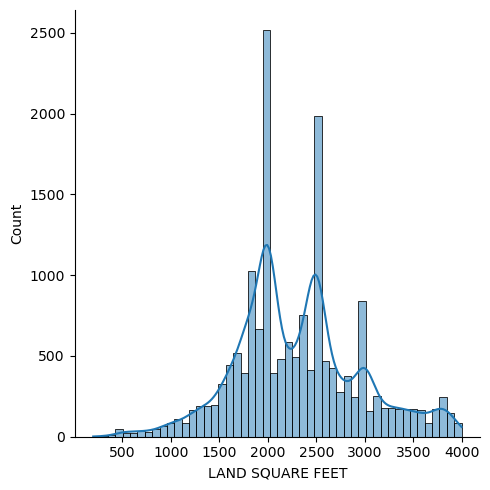

<Figure size 1200x700 with 0 Axes>

In [189]:
sns.displot(df_sqf['GROSS SQUARE FEET'], kde=True, bins=50)
sns.displot(df_sqf['LAND SQUARE FEET'], kde=True, bins=50)
plt.figure(figsize=(12,7))

Berdasarkan output di atas diketahui bahwa rata-rata luas bangunan properti yang terjual di NYC adalah sekitar 3600 sq feet, dengan rata-rata luas lahan seluruhnya di NYC adalah 2680 sq feet. Dalam plot distribusi frekuensi yang ditunjukkan kedua kolom memiliki pola distribusi yang berbeda. Di mana ukuran luas keseluruhan properti di NYC kebanyakan ada di sekitar 1600 sq feet dan ukuran luas bangunan di NYC kebanyakan ada di sekitar 2000 sq feet.

Namun, perlu menjadi catatan juga bahwa GROSS SQUARE FEET adalah ukuran luas lahan seluruhnya dan LAND SQUARE FEET adalah luas bangunan. Berarti nilai LAND SQUARE FEET kemungkinan tidak akan lebih besar dari GROSS SQUARE FEET.

In [190]:
# Menampilkan nilai varians dan standar deviasi masing-masing kolom
print('Variance and Standar Deviation:\n')
print('GROSS SQUARE FEET: ', round(df_sqf['GROSS SQUARE FEET'].var(), 2), 'and', round((df_sqf['GROSS SQUARE FEET'].var())**0.5, 2))
print('LAND SQUARE FEET: ', round(df_sqf['LAND SQUARE FEET'].var(), 2), 'and', round((df_sqf['LAND SQUARE FEET'].var())**0.5, 2))

Variance and Standar Deviation:

GROSS SQUARE FEET:  289902.65 and 538.43
LAND SQUARE FEET:  419957.57 and 648.04


Diketahui nilai varians dan standar deviasi masing-masing kolom berdasarkan *output* di atas. Nilai varians `GROSS SQUARE FEET` atau ukuran luas lahan properti seluruhnya adalah 289902.65 dengan standar deviasi sebesar 538.43. Angka ini cenderung cukup besar sehingga dapat diartikan bahwa ukuran luas lahan properti seluruhnya di NYC sangat bervariasi. Selain itu, kolom `LAND SQUARE FEET` atau ukuran luas lahan bangunan properti memiliki nilai varians sebesar 419957.57 dengan standar deviasi sebesar 648.04, yang berarti bahwa ukuran luas lahan bangunan properti di NYC sangat bervariasi (cenderung lebih bervariasi dibanding dengan ukuran luas lahan properti seluruhnya). Dalam kata lain, rata-rata jarak penyimpangan setiap titik data terhadap rata-ratanya sangat besar.

In [191]:
print('GROSS SQUARE FEET\n')
print('Range: ', np.ptp(df_sqf['GROSS SQUARE FEET']))
print('Variance: ', df_sqf['GROSS SQUARE FEET'].var())
print('Standar Deviation: ', (df_sqf['GROSS SQUARE FEET'].var())**0.5)
print('Skewness: ', scipy.stats.skew(df_sqf['GROSS SQUARE FEET'], bias=False))

print('\n--------\n')

print('LAND SQUARE FEET\n')
print('Range: ', np.ptp(df_sqf['LAND SQUARE FEET']))
print('Variance: ', df_sqf['LAND SQUARE FEET'].var())
print('Standar Deviation: ', (df_sqf['LAND SQUARE FEET'].var())**0.5)
print('Skewness: ', scipy.stats.skew(df_sqf['LAND SQUARE FEET'], bias=False))

GROSS SQUARE FEET

Range:  2849.0
Variance:  289902.6530211974
Standar Deviation:  538.4260887263891
Skewness:  0.37915125537770444

--------

LAND SQUARE FEET

Range:  3798.0
Variance:  419957.567071179
Standar Deviation:  648.0413312985361
Skewness:  0.30956225999203935


# Rata-rata luas lahan berdasarkan wilayahnya (BOROUGH)

In [192]:
df_sqf_borough = df[['BOROUGH','GROSS SQUARE FEET','LAND SQUARE FEET']]
df_sqf_borough.head()

,BOROUGH,GROSS SQUARE FEET,LAND SQUARE FEET
0,Manhattan,6794.0,2272.0
1,Manhattan,4226.0,1750.0
2,Manhattan,3360.0,1520.0
3,Manhattan,3713.0,1779.0
4,Manhattan,3586.0,1218.0


In [193]:
df_sqf_borough = df_sqf_borough.groupby('BOROUGH').mean().reset_index()
df_sqf_borough

,BOROUGH,GROSS SQUARE FEET,LAND SQUARE FEET
0,Manhattan,13058.794788,2786.459283
1,Bronx,3005.777088,3126.293698
2,Brooklyn,2766.910029,2661.175863
3,Queens,2447.540890,3761.648876
4,Staten Island,2199.338238,5163.624041


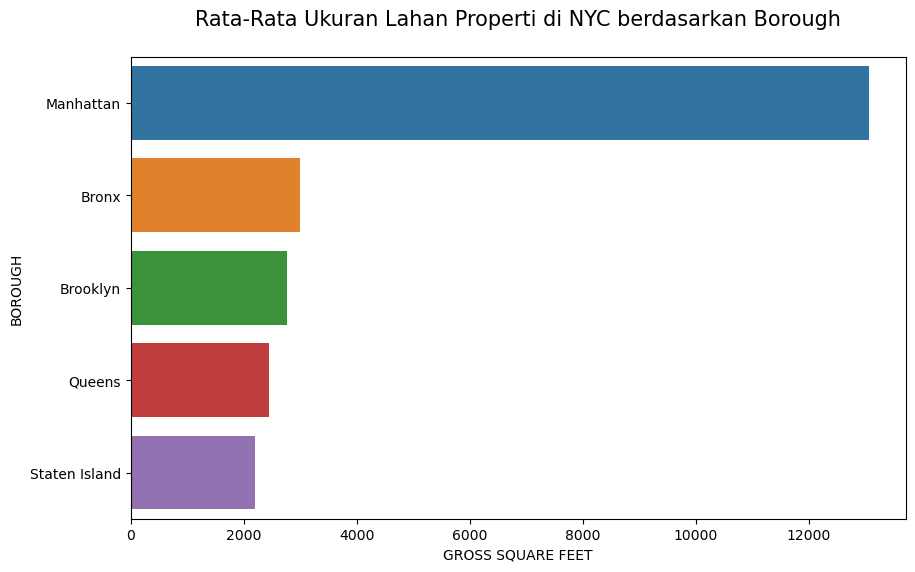

In [194]:
# Visualisasi bar chart
plt.figure(figsize=(10,6))
sns.barplot(y = 'BOROUGH', x = 'GROSS SQUARE FEET', data = df_sqf_borough)
plt.title('Rata-Rata Ukuran Lahan Properti di NYC berdasarkan Borough\n', fontsize=15)
plt.show()

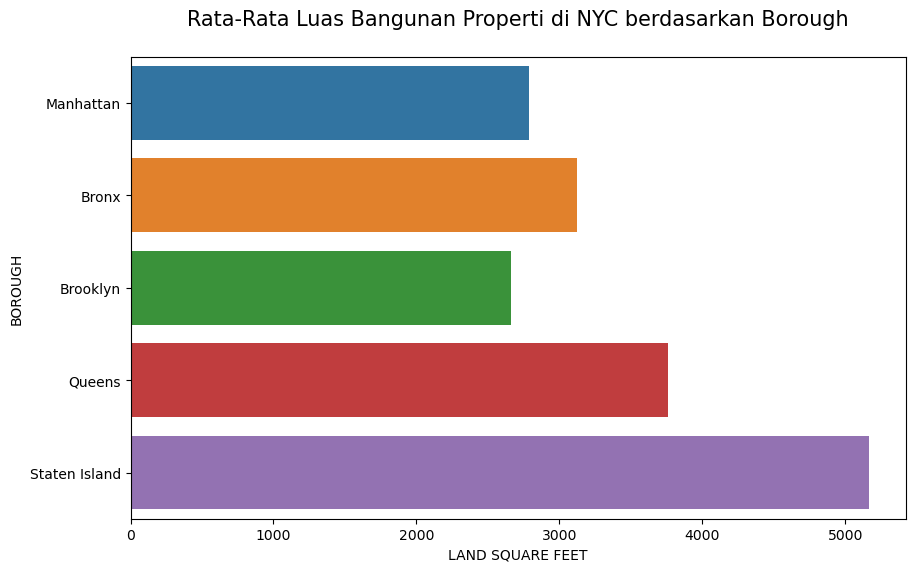

In [195]:
# Visualisasi bar chart
plt.figure(figsize=(10,6))
sns.barplot(y = 'BOROUGH', x = 'LAND SQUARE FEET', data = df_sqf_borough)
plt.title('Rata-Rata Luas Bangunan Properti di NYC berdasarkan Borough\n', fontsize=15)
plt.show()

Berdasarkan kedua plot di atas, diketahui bahwa rata-rata luas lahan keseluruhan properti tertinggi adalah di wilayah Manhattan dibandingkan dengan wilayah lain, sedangkan Staten Island memiliki rata-rata luas lahan keseluruhan properti terendah. Selain itu untuk rata-rata luas bangunan properti tertinggi adalah di Staten Island, dan yang terendah adalah di Brooklyn. Hal ini memunculkan asumsi bahwa luas lahan keseluruhan mempengaruhi harga jual properti tersebut.

# Perbedaan jumlah properti yang terjual dan harga terjualnya berdasarkan kategori kelas bangunan (BUILDING CLASS CATEGORY) masing-masing wilayah (BOROUGH)

In [196]:
# Membuat dataframe baru dengan kolom borough, building class category, dan sale price
df_building_by_borough = df[['BOROUGH', 'BUILDING CLASS CATEGORY','SALE PRICE']]

C:\Users\ACER\AppData\Local\Temp\ipykernel_15800\2967039243.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


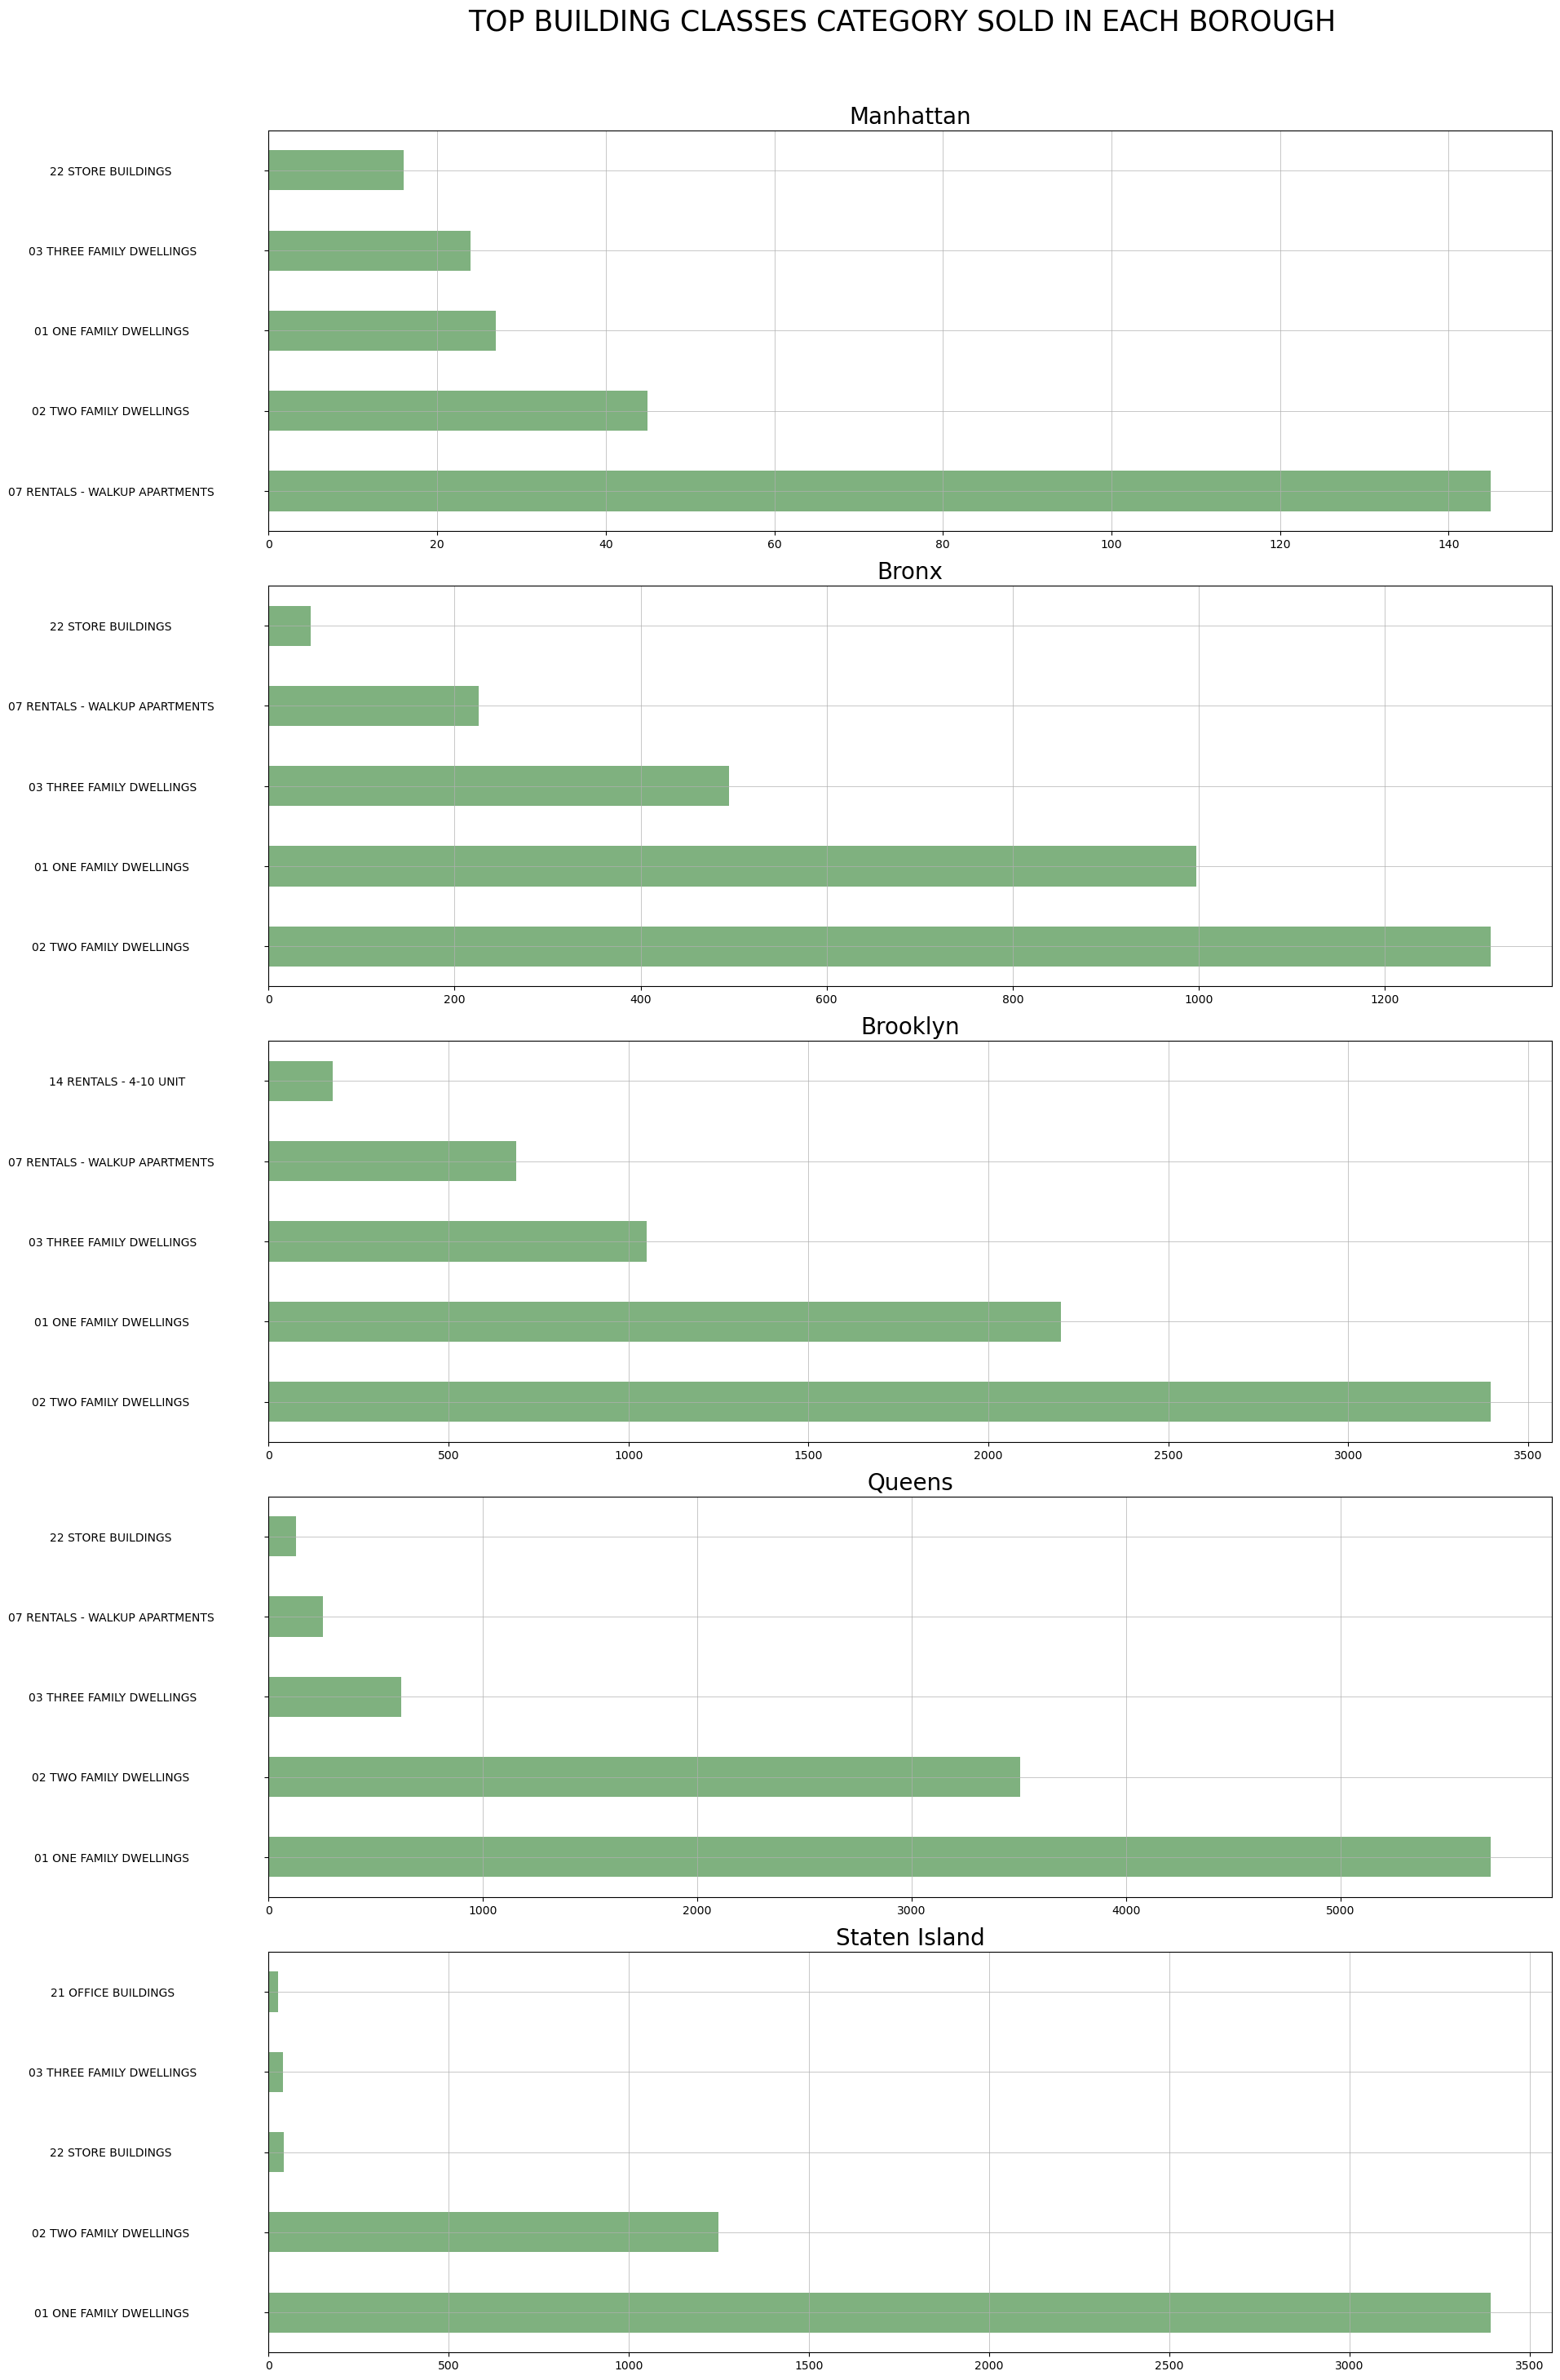

In [197]:
boroughs = df['BOROUGH'].unique().tolist()

fig, axes = plt.subplots(nrows=5, figsize=(17,30))
fig.tight_layout(pad=3)
fig.suptitle('TOP BUILDING CLASSES CATEGORY SOLD IN EACH BOROUGH', fontsize=25)
fig.subplots_adjust(top=0.93)

for i, borough in enumerate(boroughs):
    data_vis = df_building_by_borough[df_building_by_borough['BOROUGH'] == borough]
    data_vis = data_vis.groupby('BUILDING CLASS CATEGORY').count().sort_values(by='SALE PRICE', ascending=False).head()
    ax = axes[i]
    b = data_vis['SALE PRICE'].plot(kind='barh', ax=ax, color='darkgreen', alpha=0.5)
    b.set_title(borough, fontsize=20)
    b.set_ylabel('',fontsize=14)
    b.grid(linewidth=0.5)

fig.show()

Berdasarkan plot di atas, diketahui bahwa masing-masing wilayah (`BOROUGH`) memiliki jenis kategori kelas bangunan yang terbanyak terjual berbeda-beda. Di wilayah Staten Island dan Queens, kategori **ONE FAMILY DWELLINGS** adalah kategori kelas bangunan yang terbanyak terjual. Sedangkan, di Queens dan Bronx, kategori **TWO FAMILY DWELLINGS** adalah kategori yang terbanyak terjual. Di Manhattan, kategori **WALKUPS - RENTAL APARTMENTS** adalah kategori yang terbanyak terjual. Hal ini memunculkan asumsi bahwa semua wilayah kecuali Manhattan adalah wilayah dengan dominasi penjualan properti berupa rumah, sedangkan di Manhattan dominasi penjualan properti cenderung berupa gedung rental apartemen.  

Untuk rata-rata harga di masing-masing wilayah:

## Apakah ada perbedaan jumlah properti yang terjual dan harga terjualnya berdasarkan daerah di sekitarnya (`NEIGHBORHOOD`)?

In [200]:
# Membuat dataframe baru berisi kolom NEIGHBORHOOD dan SALE PRICE

df_neighborhood = df[['NEIGHBORHOOD','SALE PRICE']]

In [201]:
# Grouping

df_neighborhood = df_neighborhood.groupby('NEIGHBORHOOD').count().sort_values(by='SALE PRICE',ascending=False)
df_neighborhood = df_neighborhood.head(10)
df_neighborhood

,SALE PRICE
NEIGHBORHOOD,
FLUSHING-NORTH,759
EAST NEW YORK,558
BEDFORD STUYVESANT,557
GREAT KILLS,461
SO. JAMAICA-BAISLEY PARK,448
FLATBUSH-EAST,446
RICHMOND HILL,441
BAYSIDE,418
ST. ALBANS,405


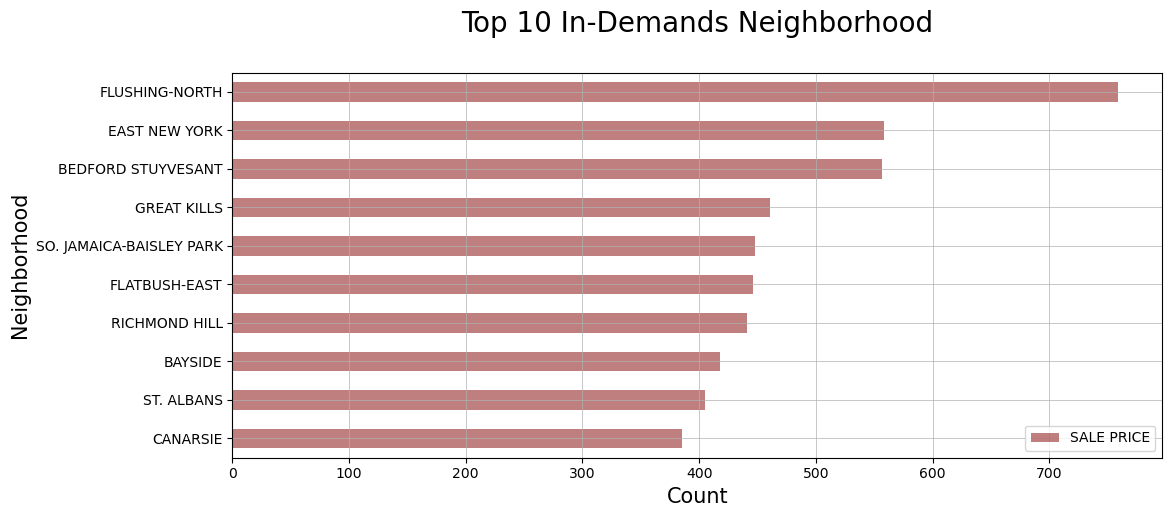

In [202]:
# Visualisasi menggunakan bar chart

df_neighborhood = df_neighborhood.sort_values(by='SALE PRICE')
df_neighborhood.plot(kind='barh', figsize=(12,5), color='maroon', alpha=0.5)
plt.title('Top 10 In-Demands Neighborhood\n', fontsize=20)
plt.ylabel('Neighborhood', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.grid(linewidth=0.5)

Berdasarkan *plot* di atas, diketahui bahwa wilayah FLUSHING-NORTH adalah `NEIGHBORHOOD` atau wilayah sekitar dengan penjualan terbanyak, diikuti oleh EAST NEW YORK, BEDFORD STUYVESANT, dan lain-lain.

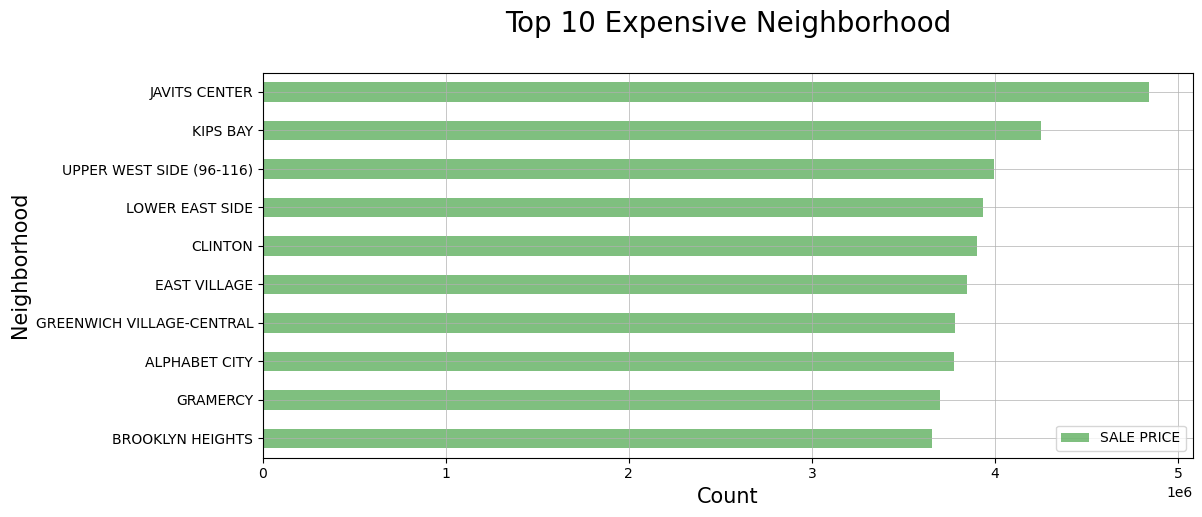

In [203]:
# Membuat dataframe baru berisi kolom NEIGHBORHOOD dan SALE PRICE
df_neighborhood = df[['NEIGHBORHOOD','SALE PRICE']]

# Grouping
df_neighborhood = df_neighborhood.groupby('NEIGHBORHOOD').mean().sort_values(by='SALE PRICE',ascending=False)
df_neighborhood = df_neighborhood.head(10)

# Visualisasi menggunakan bar chart
df_neighborhood = df_neighborhood.sort_values(by='SALE PRICE')
df_neighborhood.plot(kind='barh', figsize=(12,5), color='green', alpha=0.5)
plt.title('Top 10 Expensive Neighborhood\n', fontsize=20)
plt.ylabel('Neighborhood', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.grid(linewidth=0.5)

Berdasarkan *plot* di atas, diketahui bahwa JAVITS CENTER adalah `NEIGHBORHOOD` atau wilayah sekitar dengan rata-rata harga penjualan tertinggi.

# Pengaruh Total Unit terhadap Sale Price di New York City

Text(0.5, 1.0, 'TOTAL UNITS vs SALE PRICE')

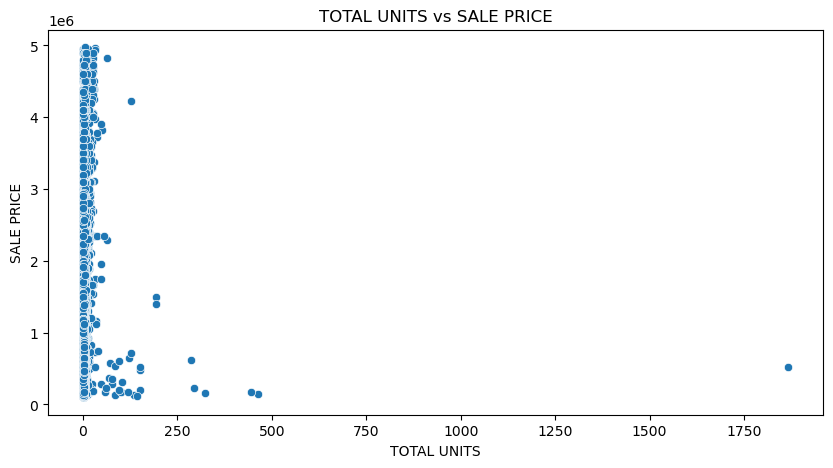

In [204]:
# Membuat dataframe berisikan kolom TOTAL UNIT dan SALE PRICE
df_totalUnit = df[['TOTAL UNITS','SALE PRICE']]

# Visualisasi menggunakan scatterplot
plt.figure(figsize=(10,5))
a = sns.scatterplot(data=df_totalUnit, x='TOTAL UNITS', y='SALE PRICE')
a.set_title('TOTAL UNITS vs SALE PRICE')

Berdasarkan *plot* di atas, diketahui bahwa tidak terdapat hubungan yang pasti antara `TOTAL UNITS` dengan `SALE PRICE` karena terdapat nilai pecilan, di mana `TOTAL UNITS` lebih besar dari 200 unit. Maka dari itu, akan dibuat tabel dengan visualisasi baru untuk melihat lebih jelas bagaimana hubungan antara `TOTAL UNITS` dengan `SALE PRICE`, di mana `TOTAL UNITS` yang lebih besar dari 200 tidak disertakan dalam analisis.

Text(0.5, 1.0, 'TOTAL UNITS vs SALE PRICE')

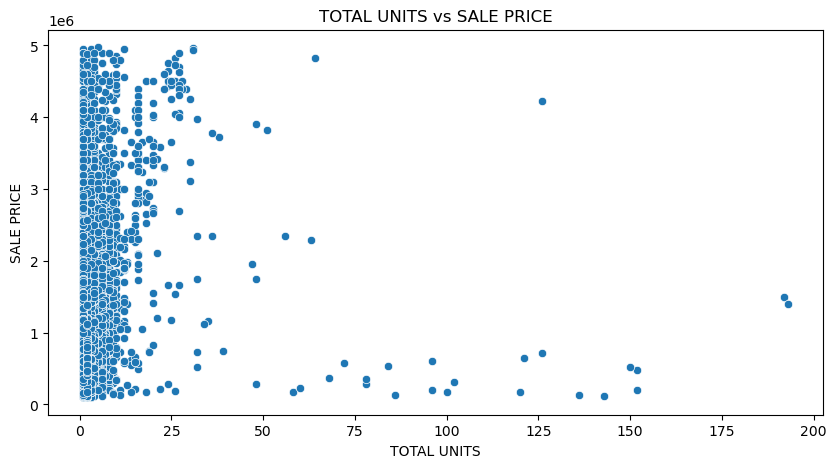

In [205]:
# Membuat dataframe baru di mana TOTAL UNITS < 200
df_totalUnit = df_totalUnit[df_totalUnit['TOTAL UNITS'] < 200]

# Visualisasi menggunakan scatterplot
plt.figure(figsize=(10,5))
a = sns.scatterplot(data=df_totalUnit, x='TOTAL UNITS', y='SALE PRICE')
a.set_title('TOTAL UNITS vs SALE PRICE')

Apabila dilihat lebih dekat, diketahui juga bahwa secara grafis tidak terdapat hubungan antara `TOTAL UNITS` dengan `SALE PRICE`. Sehingga, total unit dalam properti yang dijual tidak menentukan harga penjualan properti tersebut.

# Pengaruh GROSS SQUARE FEET dan LAND SQUARE FEET terhadap Sale Price Property

Text(0.5, 1.0, 'LAND SQUARE FEET vs SALE PRICE')

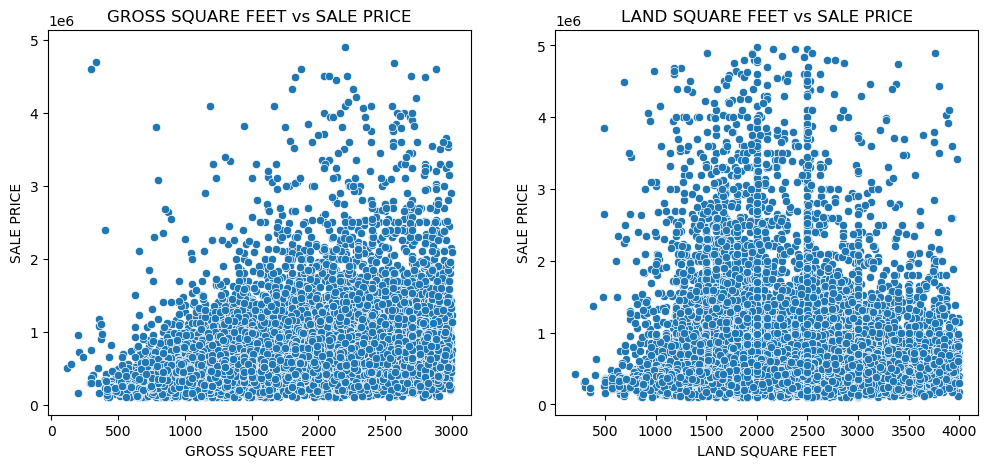

In [206]:
# Membuat dataframe baru berisikan kolom GROSS SQUARE FEET, LAND SQUARE FEET, dan SALE PRICE
df_sqf_price = df[['GROSS SQUARE FEET','LAND SQUARE FEET','SALE PRICE']]
'''Ukuran GROSS SQF dan LAND SQF yang lebih besar dari 3000 dan 4000 dianggap sebagai outlier'''
df_gross_price = df_sqf_price[df_sqf_price['GROSS SQUARE FEET'] < 3000]
df_land_price = df_sqf_price[df_sqf_price['LAND SQUARE FEET'] < 4000]

# Visualiasasi menggunakan scatterplot
fig = plt.figure(figsize=(12,5))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

sns.scatterplot(data=df_gross_price, x='GROSS SQUARE FEET', y='SALE PRICE', ax=ax0)
ax0.set_title('GROSS SQUARE FEET vs SALE PRICE')
sns.scatterplot(data=df_land_price, x='LAND SQUARE FEET', y='SALE PRICE', ax=ax1)
ax1.set_title('LAND SQUARE FEET vs SALE PRICE')

Berdasarkan *plot* di atas, diketahui secara grafis bahwa ukuran luas lahan properti seluruhnya terindikasi mempunyai pengaruh positif, karena semakin besar ukuran luas lahan properti seluruhnya akan diikuti dengan kenaikan harga jual properti tersebut. Sedangkan ukuran luas bangunan properti terindikasi tidak memiliki pengaruh terhadap harga jual properti tersebut.

# Pengaruh Sale Price terhadap TAX CLASS AT TIME OF SALE

Text(0.5, 1.0, 'TAX CLASS vs SALE PRICE')

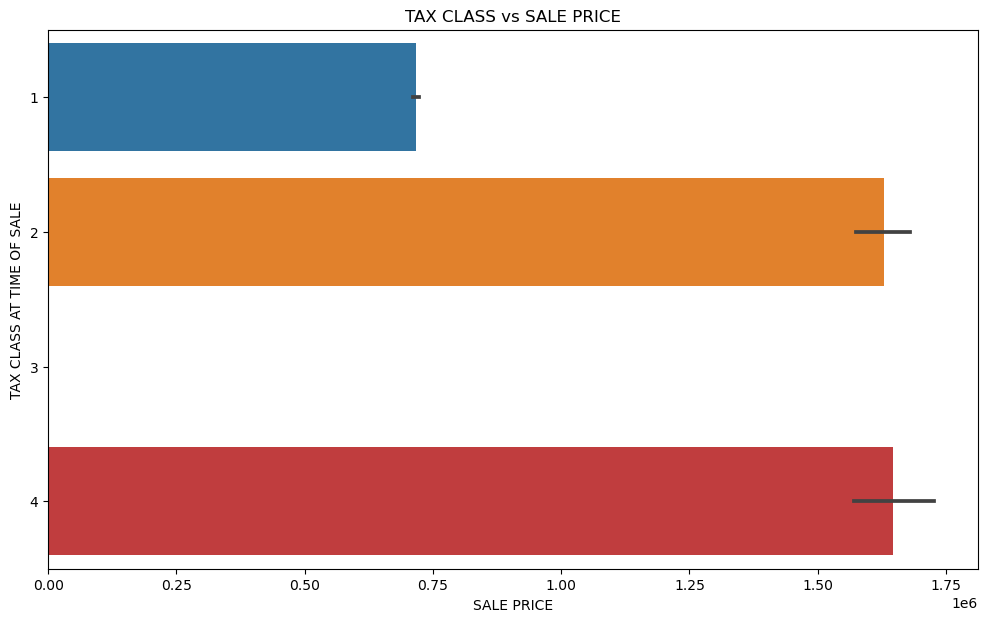

In [207]:
# Visualiasai bar plot

plt.figure(figsize=(12,7))
sns.barplot(data=df, x='SALE PRICE', y='TAX CLASS AT TIME OF SALE')
plt.title('TAX CLASS vs SALE PRICE')

Dapat dilihat dari plot di atas, bahwa diketahui secara grafis bahwa harga penjualan yang semakin tinggi maka akan digolongkan ke dalam kelas pajak yang tinggi juga.

# Confidence Interval untuk rata-rata harga penjualan properti di NYC

In [208]:
x = df['SALE PRICE'] #mendefinisikan kolom SALE PRICE sebagai x

m = x.mean()
s = x.std()
dof = len(x)-1 #degree of freedom atau derajat bebas untuk menentukan nilai statistik uji

confidence = 0.95 #peluang 
t_crit = np.abs(t.ppf((1-confidence)/2,dof)) #nilai statistik uji t

values = np.round((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))), 2)

print(values)

[798482.62 813976.07]


Berdasarkan output di atas, diketahui bahwa rata-rata harga penjualan properti di NYC berada di antara 798.482 USD sampai 813.976 USD dengan peluang atau selang kepercayaan 0.95 atau 95%.

# Confidence Interval untuk luas lahan properti seluruhnya di NYC

In [209]:
x = df['GROSS SQUARE FEET'] #mendefinisikan kolom GROSS SQUARE FEET sebagai x

m = x.mean()
s = x.std()
dof = len(x)-1 #degree of freedom atau derajat bebas untuk menentukan nilai statistik uji

confidence = 0.95 #peluang 
t_crit = np.abs(t.ppf((1-confidence)/2,dof)) #nilai statistik uji t

values = np.round((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))), 2)

print(values)

[2383.68 2988.93]


Berdasarkan output di atas, diketahui bahwa luas lahan properti di NYC memiliki rata-rata sebesar 2383.68 square feet sampai degan 2988.93 square feet dengan rata-rata harga sekitar 800.000 USD.

# Hypothesis testing untuk GROSS SQUARE FEET dan SALE PRICE

Sebelumnya telah diketahui bahwa berdasarkan analisis statistik deskriptif, GROSS SQUARE FEET atau ukuran luas lahan properti seluruhnya mempengaruhi SALE PRICE atau harga penjualan properti tersebut. Maka dari itu, asumsi ini akan dibuktikan apakah GROSS SQUARE FEET mempengaruhi SALE PRICE menggunakan statistik uji Chi-Square dengan hipotesis sebagai berikut:

H0: GROSS SQUARE FEET tidak mempengaruhi nilai SALE PRICE

H1: GROSS SQUARE FEET mempengaruhi nilai SALE PRICE

In [210]:
table = [df['GROSS SQUARE FEET'], df['SALE PRICE']] #membua list berisikan nilai GROSS SQUARE FEET dan SALE PRICE

stat, p, dof, expected = chi2_contingency(table)

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=1859488448.483, p=0.000
Probably dependent


Berdasarkan hasil analisis uji Chi-square berikut diketahui bahwa p-value < 0.05 yang berarti H0 ditolak. Sehingga, GROSS SQUARE FEET mempengaruhi nilai SALE PRICE.

# Hypothesis testing untuk harga penjualan properti di Bronx dan Staten Island

Berdasarkan analisis sebelumnya (5.2), diketahui bahwa secara grafis wilayah Bronx dan Staten Island tidak memiliki perbedaan distribusi statistik yang signifikan, tidak seperti wilayah Manhattan dan Brooklyn. Sehingga, ini juga memunculkan asumsi apakah rata-rata harga penjualan properti di Bronx dan Staten Island sama atau tidak. Dengan menggunakan uji statistik t, berikut hipotesisnya:

H0: Rata-rata harga penjualan di Bronx dan Staten Island sama

H1: Rata-rata harga penjualan di Bronx dan Staten Island tidak sama

stat=7.596, p=0.000
Probably different distributions


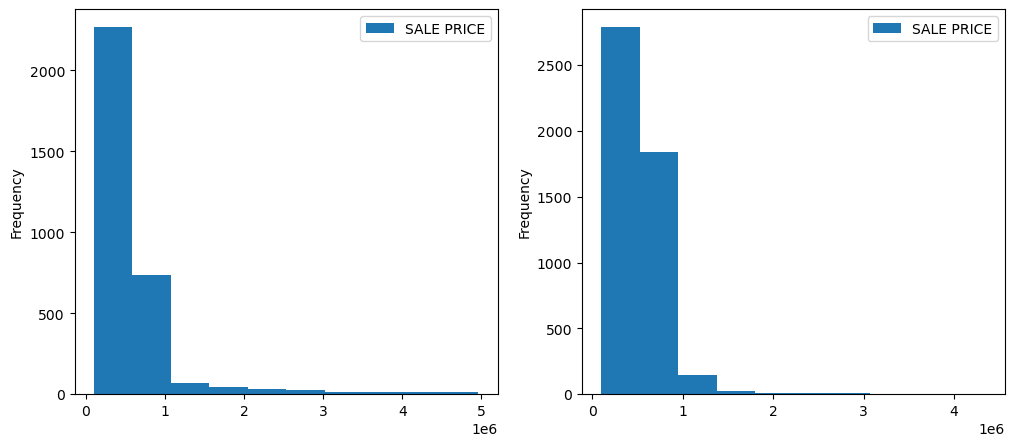

In [211]:
df_sale_price = df[['BOROUGH','SALE PRICE']]
df_bronx = df_sale_price[df_sale_price['BOROUGH']=='Bronx'].drop('BOROUGH', axis=1)
df_staten = df_sale_price[df_sale_price['BOROUGH']=='Staten Island'].drop('BOROUGH', axis=1)

fig = plt.figure(figsize=(12,5))
df_bronx.plot(kind='hist', ax=fig.add_subplot(1,2,1))
df_staten.plot(kind='hist',ax=fig.add_subplot(1,2,2))

stat, p = ttest_ind(df_bronx, df_staten)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Berdasarkan output di atas, diketahui bahwa nilai p-value < 0.05 yang berarti H0 ditolak. Sehingga, rata-rata harga penjualan di Bronx dan Staten Island tidak sama. Berarti wilayah BOROUGH mempengaruhi harga penjualan properti.

# Kesimpulan

1. Rata-rata harga penjualan properti di NYC berkisar di antara 798.482 USD sampai 813.976 USD dengan ukuran luas lahan seluruhnya berkisar di antara 2383.68 square feet sampai degan 2988.93 square feet.
2. Harga penjualan properti di NYC juga memiliki nilai varians dan standar deviasi yang sangat besar, ini berarti harga penjualan properti di NYC sangat bervariasi.
3. Wilayah BOROUGH mempengaruhi harga penjualan properti. Di mana, wilayah Manhattan adalah wilayah dengan rata-rata harga penjualan tertinggi dan memiliki nilai varians tertinggi juga.
4. Selain wilayah, ukuran luas lahan properti seluruhnya (`GROSS SQUARE FEET`) juga mempengaruhi harga penjualan properti di NYC, di mana berdasarkan informasi secara grafis, semakin besar ukuran luas lahan properti, maka harga jual juga semakin tinggi.
5. Queens adalah wilayah dengan jumlah penjualan properti paling banyak.
6. Semakin lama usia properti atau bangunan tersebut, rata-rata harga jual cenderung semakin tinggi.
7. Kategori OTHER HOTELS adalah kategori kelas bangunan dengan rata-rata harga jual tertinggi. Sedangkan, jika dilihat berdasarkan wilayahnya, masing-masing wilayah memiliki kategori kelas bangunan dengan rata-rata jual tertinggi yang berbeda-beda.
8. Kategori ONE FAMILY DWELLINGS adalah kategori kelas bangunan dengan jumlah penjualan tertinggi.
9. Harga penjualan properti akan mempengaruhi pengelompokkan kelas pajak, di mana semakin besar harga jual, maka kelas pajak juga akan semakin tinggi.
10. Selama September 2016 sampai dengan Agustus 2017, tidak terdapat perbedaan rata-rata harga penjualan properti yang signifikan. Dalam kata lain, penjualan tidak membentuk tren khusus berdasarkan bulannya. Di sisi lain, Agustus 2017 adalah waktu dengan rata-rata harga penjualan tertinggi dan April 2017 adalah waktu dengan jumlah penjualan properti terbanyak
11. Perlu menjadi perhatian bahwa masih terdapat nilai pecilan yang tidak disertakan dalam analisis.